# Анализ фондового рынка. 

<b>Описание проекта</b><br>
Из импортированных файлов  с информацией о динамике цен акций на фондовом рынке необходимо собрать датафрейм, осуществить предобработку, добавить метрики и провести исследовательский анализ цены за последние 3 года. В исследовании использовать скользящие средние, экспотенциальные скользящие средние и RSI индикатор.



**Навигация**

* [Задание 1](#1)
* [Задание 2](#2)
* [Задание 3](#3)
* [Задание 4](#4)
* [Задание 5](#5)
* [Задание 6](#6)
* [Задание 7](#7)
* [Задание 8](#8)
* [Задание 9](#9)
* [Задание 10](#10)
* [Задание 11](#11)
* [Доп. задание](#12)

**Задание**
1. Загрузите информацию об акциях (не менее пяти тикеров) с сайте finam.ru с параметрами:
Интервал: 3 года, периодичность 1 день.
Формат записи в файл:
<TICKER>	<PER>	<DATE>	<TIME>	<OPEN>	<HIGH>	<LOW>	<CLOSE>	<VOL>
https://www.finam.ru/quote/moex/gazp/export/
2. Соберите информацию из файлов в единый датафрейм (используйте дополнительные библиотеки).
3. Осуществите предобработку дат и заголовков.
4. Постройте линейные графики динамики цены для каждой акции (реализуйте в цикле).
5. Для каждой акции найдите дни максимального изменения цены (взлета и падения). Составьте отчет.
6. Найдите скользящие средние (периоды 10, 50, 100) для каждой акции. Добавьте на график.
7. Постройте в цикле графики объема (volume) для каждого тикера.
8. Реализуйте в цикле для каждого тикера последовательно: график цены вместе с скользящими средними с периодом 50, 100 и график объема, реализуйте с помощью функции. На вход функция принимает два параметра: тикер и год.
9. Добавьте экспоненциальные скользящие средние для каждого тикера с периодом 50.
10. Осуществите расчет индикатора RSI.
11.  Создайте функцию для вывода графиков: цены, скользящей средней (тип и период определите самостоятельно) и отдельный график для RSI индикатора. На графике с RSI добавьте две красные линии на уровнях 70 и 30. На вход функция принимает два параметра: тикер и год. <br>

Работу сопроводите комментариями к коду и выводами. 

**Дополнительная задача**<br>
Постройте модель прогноза цены акции

**Дополнительная информация**
1. Экпорт файлов осуществите с сайта:
https://www.finam.ru/quote/moex/gazp/export/
2. Для получения файлов из заданной директории используйте:

import glob<br>
globbed_files = glob.glob(path) # список файлов<br>

3. Информация про индикатор RSI
на БКС Экспресс:<br>
https://bcs-express.ru/novosti-i-analitika/indeks-otnositel-noi-sily-rsi-relative-strength-index<br>
Почитать еще про RSI:<br>
https://ru.tradingview.com/chart/BTCUSD/Eq8tysZA-indikator-rsi-sekrety-torgovli-pravila-primeneniya-polnyj-razbor/

3. Допустима загрузка исторических данных с помощью tinkoff invest api вместо экспорта с finam.ru

**Дополнительная задача**<br>
Постройте модель прогноза цены акции

## <a class="anchor" id="1"></a> Задание 1

**Загрузим информацию об акциях**

In [1]:
import glob
import pandas as pd

#Указываем путь
path = 'C:\\Users\\1\\OneDrive\\Рабочий стол\\3 курс (5 семестр)\\Анализ данных\\Файлы\\'

#Ищем все csv файлы в указанной папке
globbed_files = glob.glob(path + '*.csv')

print(globbed_files)

['C:\\Users\\1\\OneDrive\\Рабочий стол\\3 курс (5 семестр)\\Анализ данных\\Файлы\\GAZP_24122020_24122023.csv', 'C:\\Users\\1\\OneDrive\\Рабочий стол\\3 курс (5 семестр)\\Анализ данных\\Файлы\\LKOH_24122020_24122023.csv', 'C:\\Users\\1\\OneDrive\\Рабочий стол\\3 курс (5 семестр)\\Анализ данных\\Файлы\\SBER_24122020_24122023.csv', 'C:\\Users\\1\\OneDrive\\Рабочий стол\\3 курс (5 семестр)\\Анализ данных\\Файлы\\TATN_24122020_24122023.csv', 'C:\\Users\\1\\OneDrive\\Рабочий стол\\3 курс (5 семестр)\\Анализ данных\\Файлы\\VTBR_24122020_24122023.csv']


## <a class="anchor" id="2"></a> Задание 2

**Соберем данные в единый датасет**

In [2]:
#Создаем пустой датафрейм
df = pd.DataFrame()

#Загружаем файл из найденных с помощью glob и добавляем в созданный датафрейм
for file in globbed_files:
    data = pd.read_csv(file, sep=';', parse_dates=['<DATE>']) #Преобразовываем дату в формат datetime
    df = df.append(data, ignore_index=True)

C:\Users\1\AppData\Local\Temp\ipykernel_34748\2989247161.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\1\AppData\Local\Temp\ipykernel_34748\2989247161.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\1\AppData\Local\Temp\ipykernel_34748\2989247161.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\1\AppData\Local\Temp\ipykernel_34748\2989247161.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\1\AppData\Local\Temp\ipykernel_34748\29

In [3]:
df.head()

<TICKER> <PER>     <DATE>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>     <VOL>
0     GAZP     D 2020-12-24       0  208.54  209.96  203.15   206.24  59081790
1     GAZP     D 2020-12-25       0  206.20  206.73  204.01   205.03  16517780
2     GAZP     D 2020-12-28       0  205.53  207.86  205.15   206.11  35038710
3     GAZP     D 2020-12-29       0  206.95  210.00  206.61   208.75  42353620
4     GAZP     D 2020-12-30       0  209.88  213.38  209.50   212.98  74667210

## Задание <a class="anchor" id="3"></a> 3

**Осуществим предобработку заголовков (предобработка дат была осуществлена при загрузке файлов)**

In [4]:
df.columns = ['ticker', 'per', 'date', 'time', 'open', 'high', 'low', 'close', 'vol']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3715 entries, 0 to 3714
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ticker  3715 non-null   object        
 1   per     3715 non-null   object        
 2   date    3715 non-null   datetime64[ns]
 3   time    3715 non-null   int64         
 4   open    3715 non-null   float64       
 5   high    3715 non-null   float64       
 6   low     3715 non-null   float64       
 7   close   3715 non-null   float64       
 8   vol     3715 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 261.3+ KB


Типы данных в норме, пропуски отсутствуют. Идем дальше

## Задание <a class="anchor" id="4"></a> 4

Существует несколько видов графиков для отображения стоимости ценных бумаг. Посмотрим на динамику акций с помощью линейного (отображает только цену закрытия) и свечного (отображает цену закрытия и открытия, а также максимальное и минимальное значение цены) графиков

In [6]:
import matplotlib.pyplot as plt

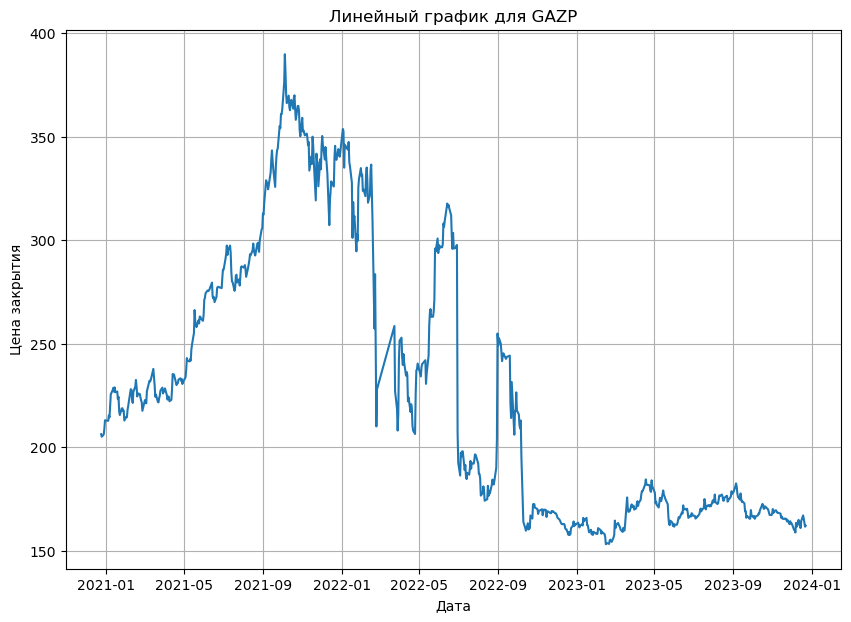

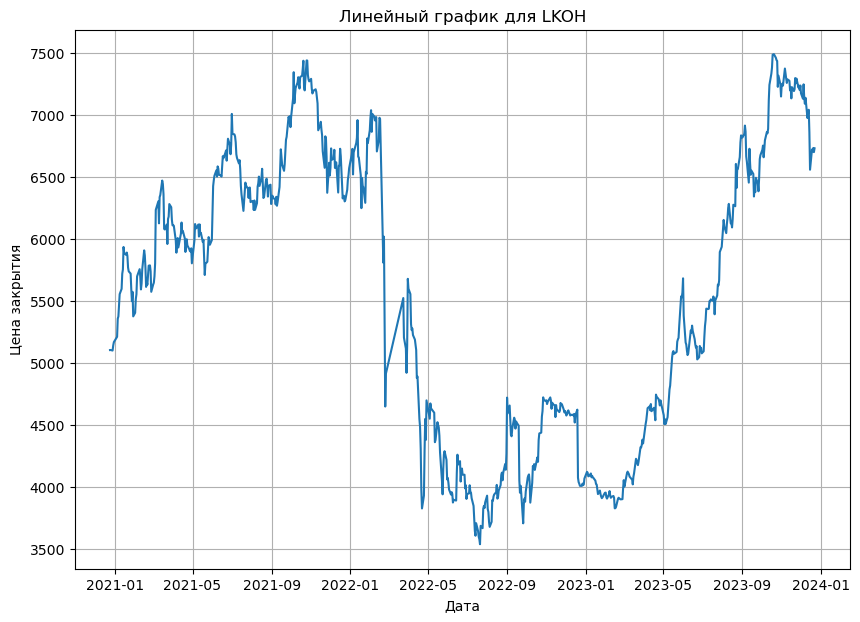

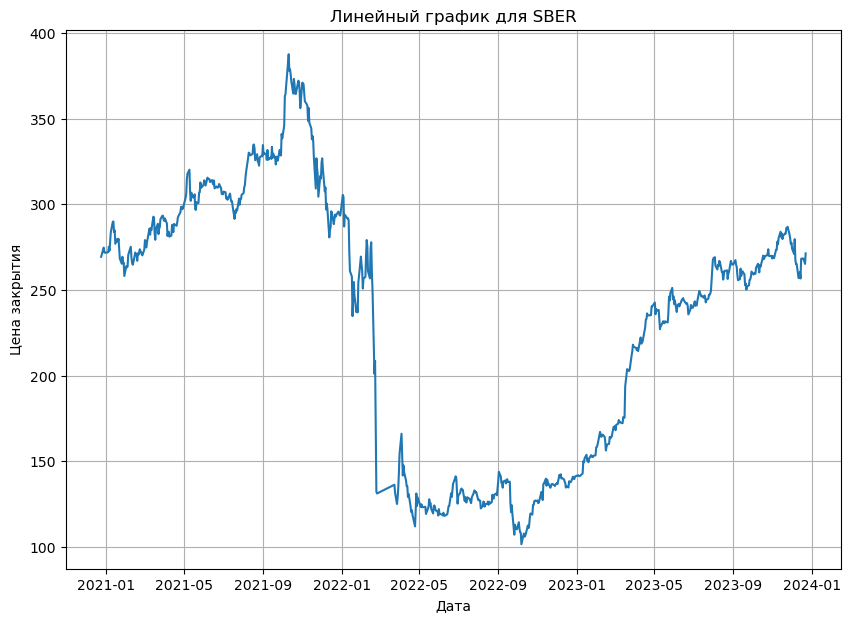

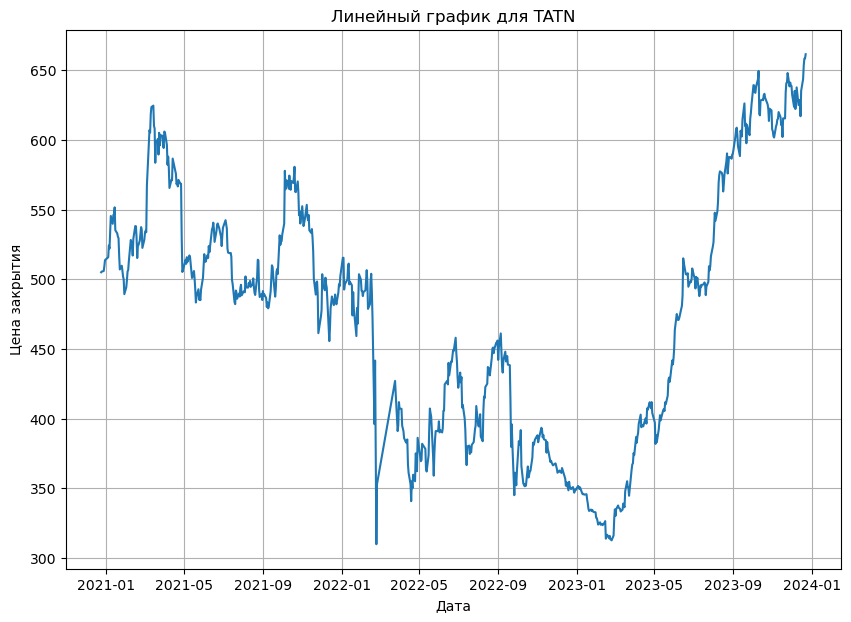

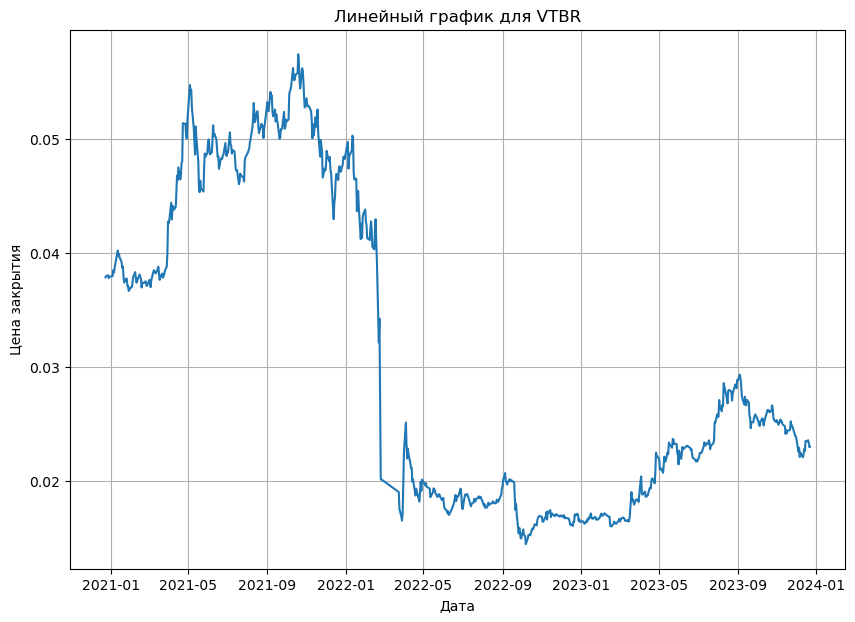

In [7]:
#Создадим список с уникальными названиями тикеров
tickers = df['ticker'].unique()

for item in tickers:
    tic = df.query('ticker == @item') #Фильтруем данные по переменной item 
    tic = tic.set_index('date') #Сделаем столбец с датой индексом

#Строим график
    plt.figure(figsize=(10, 7))
    plt.plot(tic['close'])
#Добавляем подписи к осям
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.title(f'Линейный график для {item}')
    plt.grid()
    plt.show()

In [8]:
import plotly.graph_objects as go

tickers = df['ticker'].unique()

for item in tickers:
    can = df.query('ticker == @item')
    can = can.set_index('date')

    fig = go.Figure(data=[go.Candlestick(
        x=can.index,
        open=can['open'],
        high=can['high'],
        low=can['low'],
        close=can['close'],
        name=item)])

    fig.update_layout(
        title=f'Свечной график для {item}',
        xaxis_title='Дата',
        yaxis_title='Цена',
        xaxis_rangeslider_visible=False)

    fig.show()

Глядя на графики, можно заметить, что в начале 2022 года (февраль-март) все акции российских компаний резко упали. Такому явлению есть несколько причин: 

1. Начало СВО и угроза санкций. Возможность введения новых экономических санкций против России усилила отток капитала и снижение доверия инвесторов к российским активам;
2. Внутренние экономические проблемы, включая высокую инфляцию и замедление экономического роста, также сказались на фондовом рынке

## <a class="anchor" id="5"></a> Задание 5

**Для каждой акции найти дни максимального изменения цены (взлета и падения). Составить отчет**

Цены закрытия являются полезными маркерами, которые инвесторы могут использовать для оценки изменений цен акций с течением времени

Цена закрытия считается наиболее точной оценкой акции или другой ценной бумаги до возобновления торгов на следующий торговый день

Соответственно логичнее для определения максимальных взлета и падения рассчитать разницу цены закрытия текущего дня и цены закрытия предыдущего дня

In [9]:
#Создаем пустой список
report = []

tickers = df['ticker'].unique()

#Создаем цикл, внутри которого пройдем по дням и сравним текущую цену закрытия с ценой закрытия предыдущего дня

for item in tickers:
    data = df.query('ticker == @item')
    
    #Создадим переменные для хранения максимальных значений изменений цен и дат
    max_inc = 0
    max_dec = 0
    max_inc_date = None
    max_dec_date = None
    
    #Перебираем строки в датафрейме для каждой акции
    for index, row in data.iterrows():
        
        #Вычисляем разницу цен закрытия текущего и предыдущего дней
        if index > 0:
            close_price = row['close']
            prev_index = index - 1
            
            #Проверяем есть ли предыдущий индекс в датафрейме для конкретной акции
            if prev_index in data.index:
                prev_close_price = data.loc[prev_index, 'close']
            
                #Сравниваем текущее изменение с максимальным взлетом/падением
                if close_price - prev_close_price > max_inc:
                    max_inc = close_price - prev_close_price
                    max_inc_date = row['date']
            
                if close_price - prev_close_price < max_dec:
                    max_dec = close_price - prev_close_price
                    max_dec_date = row['date']
                    
    #Собираем отчет
    report.append({
        'ticker': item,
        'max_inc_date': max_inc_date,
        'max_inc': max_inc,
        'max_dec_date': max_dec_date,
        'max_dec': max_dec
    })

report = pd.DataFrame(report)
report

ticker max_inc_date    max_inc max_dec_date      max_dec
0   GAZP   2022-08-31   50.90000   2022-06-30   -90.650000
1   LKOH   2022-03-24  610.00000   2022-02-24 -1370.000000
2   SBER   2023-07-31   18.15000   2022-02-24   -76.350000
3   TATN   2022-03-24   71.00000   2022-02-24  -131.800000
4   VTBR   2021-04-23    0.00336   2022-02-24    -0.014115

Мы видим, что почти все акции упали в день начала СВО - 24.02.2022. Акции Газпрома тоже упали в этот день, но не так сильно по сравнению с 06.30.2022

Обвал акций компании в конце июня 2022 года более чем на 30% связан с решением, принятым на собрании акционеров, не выплачивать дивиденды за 2021 год. До данного сообщения акции "Газпрома" росли более чем на два процента

## <a class="anchor" id="6"></a> Задание 6

**Найти скользящие средние (периоды 10, 50, 100) для каждой акции и добавить на график**

Основное назначение этого индикатора - устранение быстрых колебаний цены, т.е. скользящие средние выступают фильтром, выделяющим долгосрочные тенденции и устраняющим краткосрочные движения. 

У подобного индикатора есть существенный недостаток - реакция на изменение базы для расчета (цены акции) наступает с некоторым запозданием (временным лагом)

In [10]:
#Создаем списки с периодами для скользящего среднего и цветами
sma_list = [10, 50, 100]
colors = ['red', 'orange', 'green']

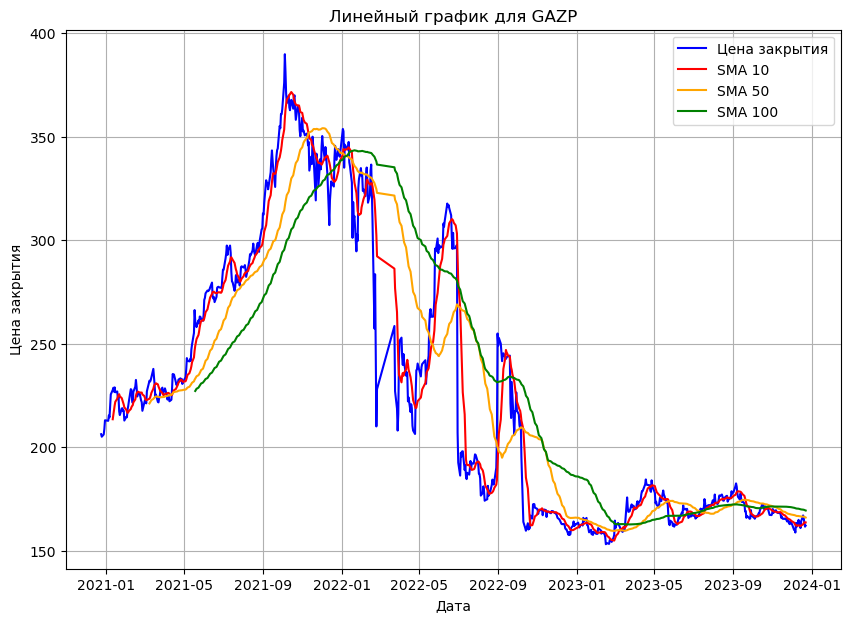

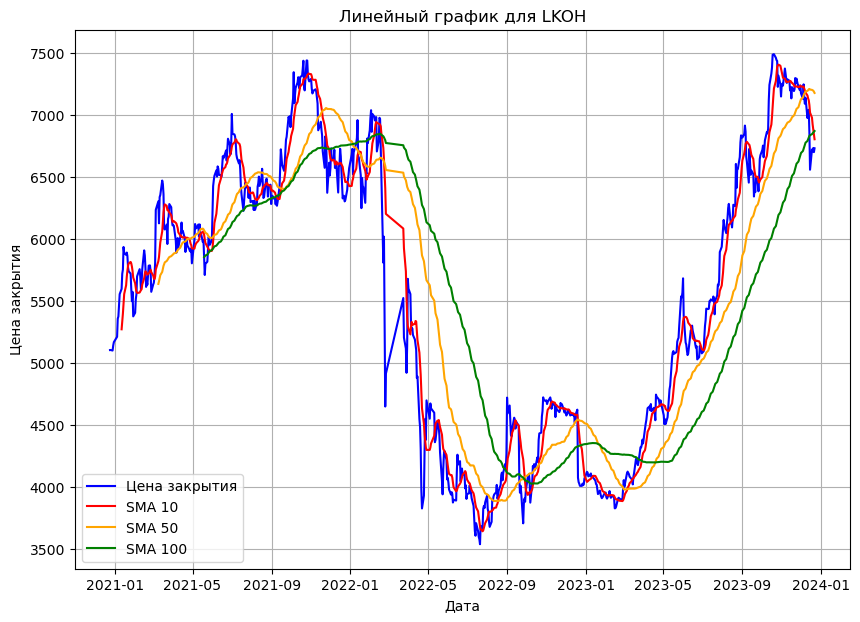

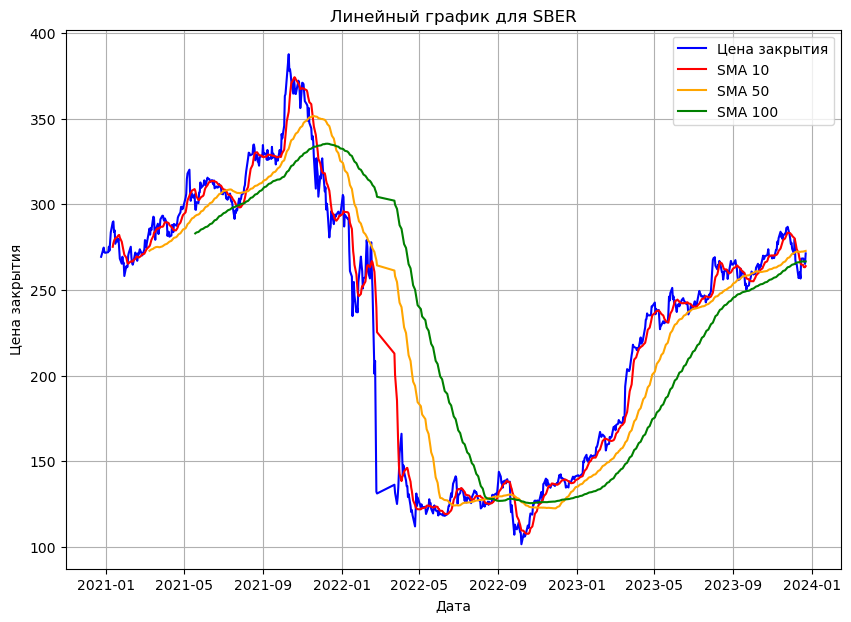

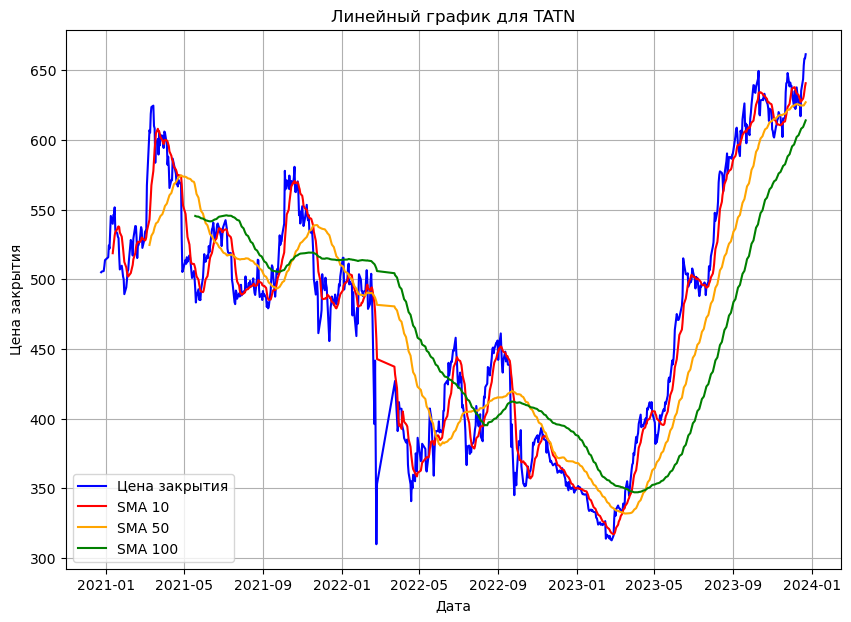

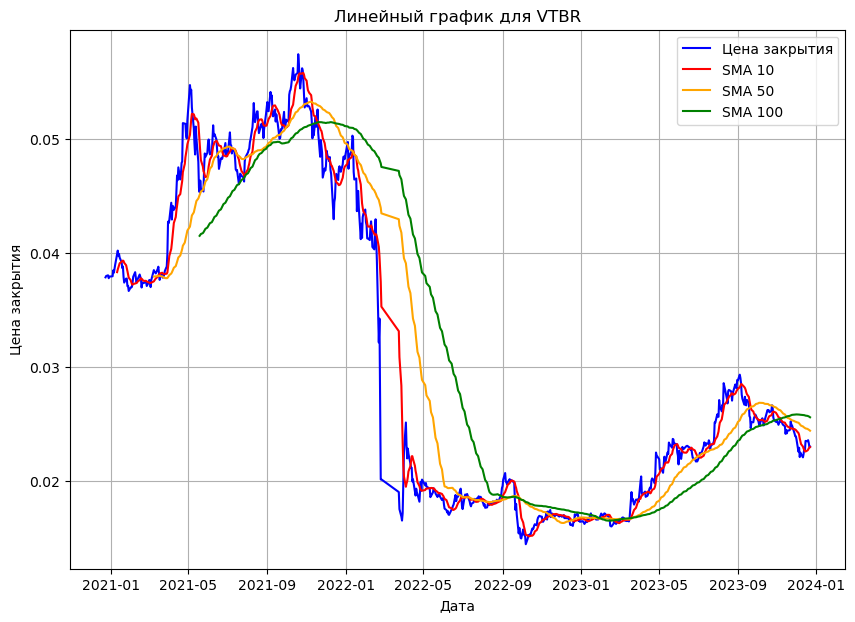

In [11]:
tickers = df['ticker'].unique()

for item in tickers:
    tic = df.query('ticker == @item')
    tic = tic.set_index('date')

#Строим график
    plt.figure(figsize=(10, 7))
    plt.plot(tic.index, tic['close'], label='Цена закрытия', color='blue')
     
    for i, n in enumerate(sma_list):
        sma_label = f'SMA {n}'
        tic[sma_label] = tic['close'].rolling(window=n).mean()
        plt.plot(tic.index, tic[sma_label], label=sma_label, color=colors[i])
    
        
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.title(f'Линейный график для {item}')
    plt.legend()
    plt.grid()
    plt.show()

Можно заметить, что пересечение графиком цены линии скользящего среднего свидетельствует о смене тенденции. Наклон скользящей средней показывает направление тренда

1. Цена под линией SМА, сама скользящая средняя движется вниз - нисходящий тренд, медвежий рынок;
2. Цена выше линии скользящей средней, SМА направлена вверх - восходящий тренд, бычий рынок

Таким образом, на всех графиках в течение всего рассматриваего периода наблюдается преимущественно нисходящий тренд, так называемый "медвежий рынок"

## <a class="anchor" id="7"></a> Задание 7

**Построить в цикле графики объема (volume) для каждого тикера**

Объем - это количество акций, обращающихся за определенный период времени (обычно изображается с помощью столбчатых диаграмм)

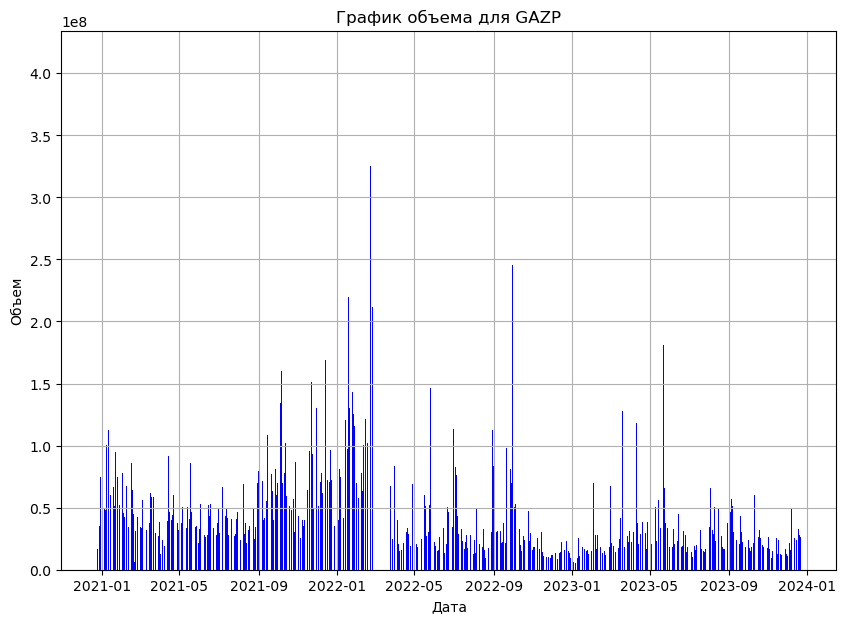

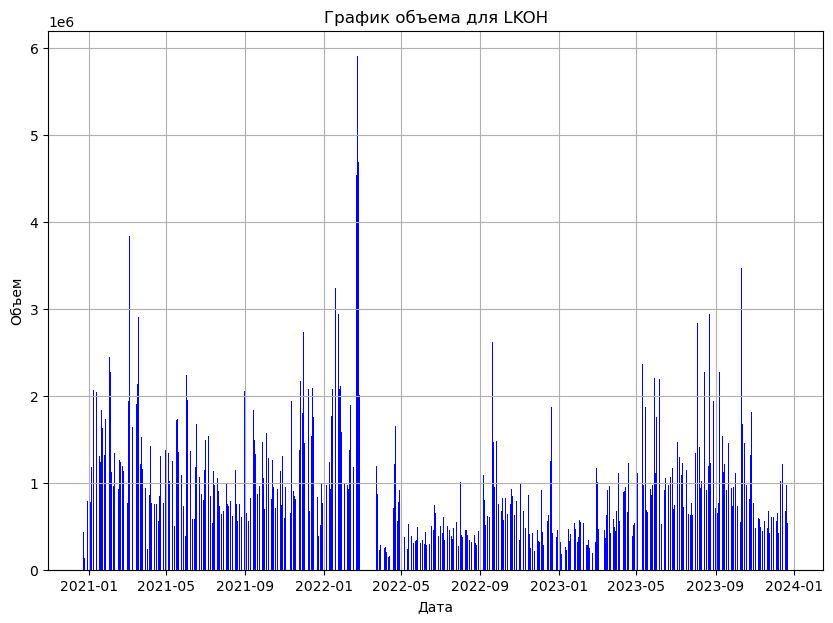

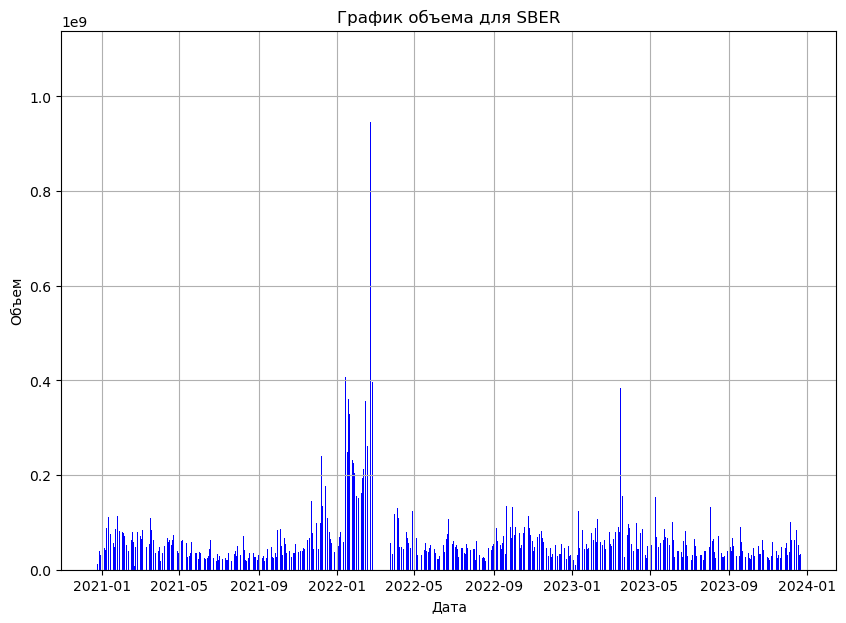

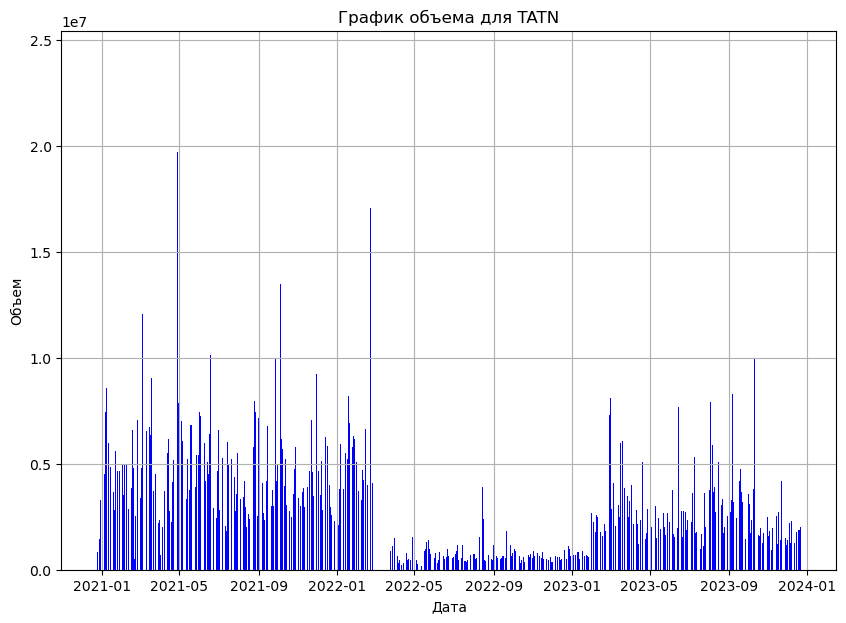

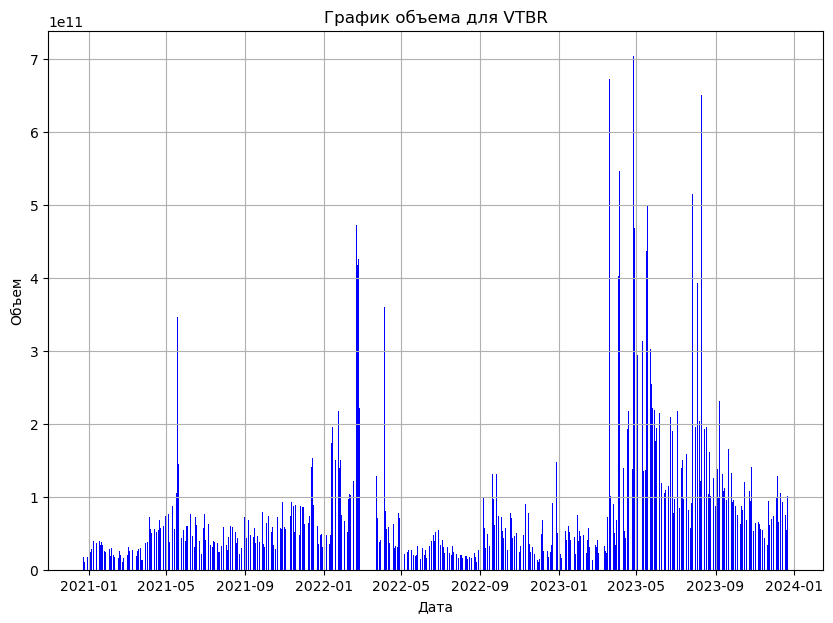

In [12]:
tickers = df['ticker'].unique()

for item in tickers:
    tic = df.query('ticker == @item')
    tic = tic.set_index('date')

#Строим график
    plt.figure(figsize=(10, 7))
    plt.bar(tic.index, tic['vol'],color='blue')
    
    plt.xlabel('Дата')
    plt.ylabel('Объем')
    plt.title(f'График объема для {item}')
    plt.grid()
    plt.show()

Если рынок совершает значительные колебания в течение определенного периода, то сила этого движения либо вызывает доверие, либо рассматривается со скептицизмом в зависимости от наблюдаемого объема. Чем выше объем во время движения цены, тем более значительным считается движение

Наибольшее увеличение объемов произошло в начале 2023 года с акциями ВТБ. Вероятно, это связано с объявлением банком допэмиссии, доходность акций снижается, т.к. уменьшается доля акционеров в компании, следовательно владельцы акций спешат быстрее их продать

## <a class="anchor" id="8"></a> Задание 8

**Реализовать в цикле для каждого тикера последовательно: график цены вместе со скользящими средними с периодом 50, 100 и график объема, реализовать с помощью функции. На вход функция принимает два параметра: тикер и год**

In [13]:
def vol_price(ticker, year):
    data = df[(df['ticker'] == ticker) & (df['date'].dt.year == year)]
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
    
    #Строим графики цены закрытия и скользящего среднего
    axes[0].plot(data['date'], data['close'], label='Цена закрытия', color='b')
    axes[0].plot(data['date'], data['close'].rolling(window=50).mean(), label='SMA 50', color='g')
    axes[0].plot(data['date'], data['close'].rolling(window=100).mean(), label='SMA 100', color='r')
    axes[0].set_ylabel('Цена')
    axes[0].set_title(f'Динамика цены и скользящие средние для {ticker} в {year}')
    axes[0].grid()
    axes[0].legend()
    
    #Строим графики объемов
    axes[1].bar(data['date'], data['vol'], color='c')
    axes[1].set_xlabel('Дата')
    axes[1].set_ylabel('Объем')
    axes[1].set_title(f'Динамика объема для {ticker} в {year}')
    axes[1].grid()
    
    plt.tight_layout()
    plt.show()

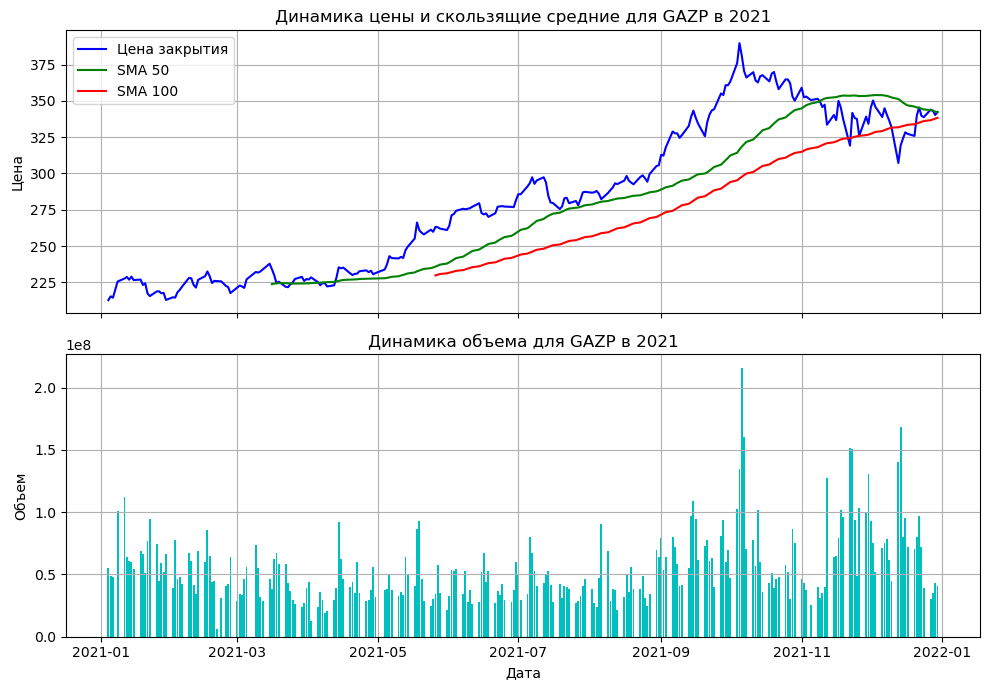

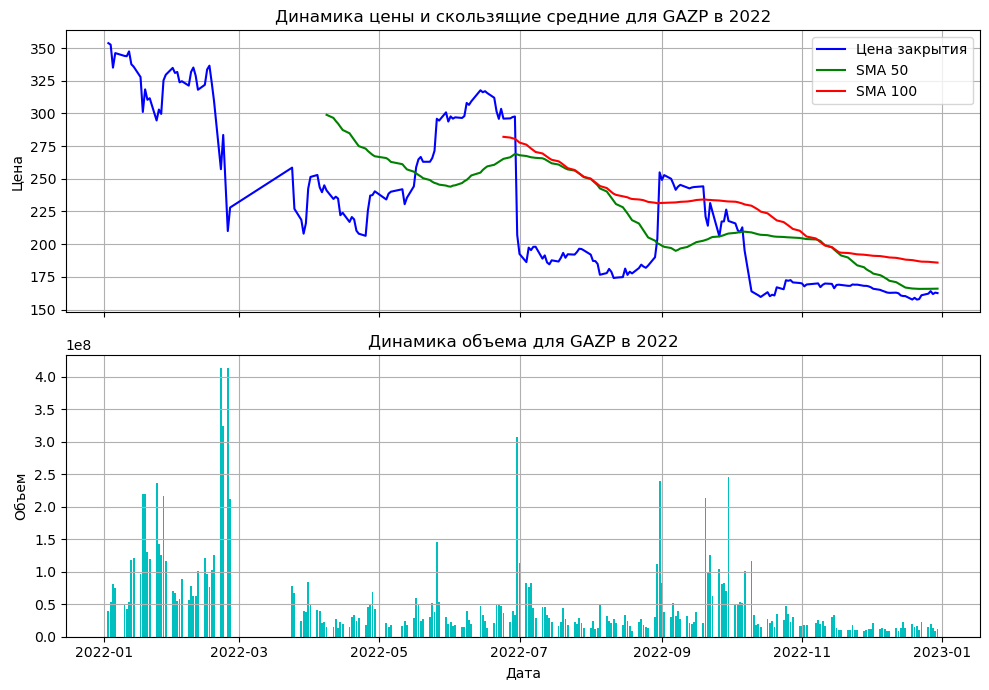

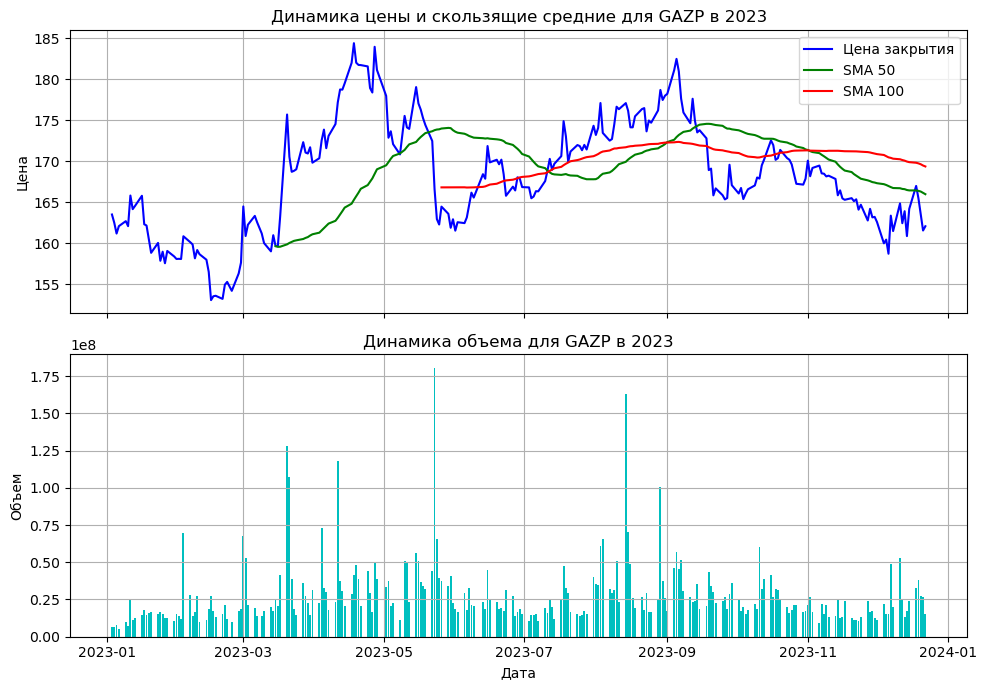

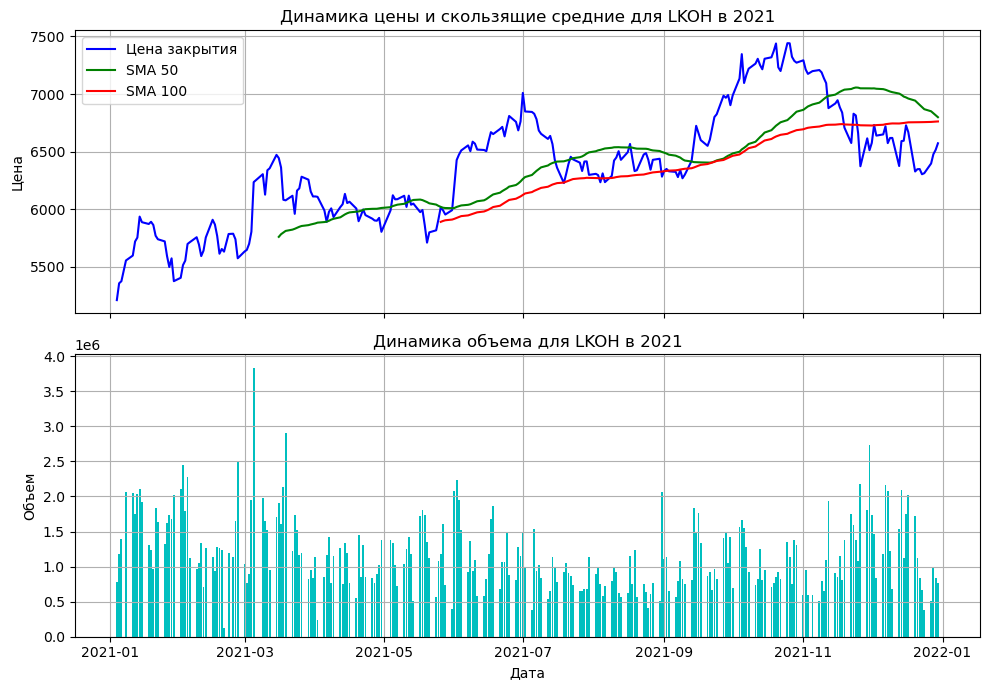

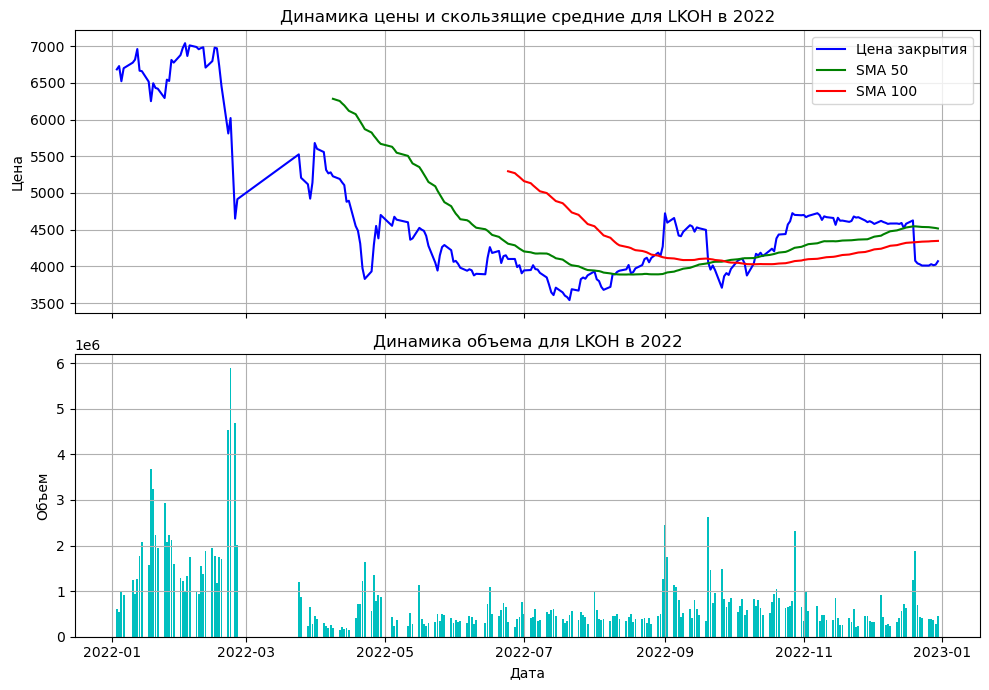

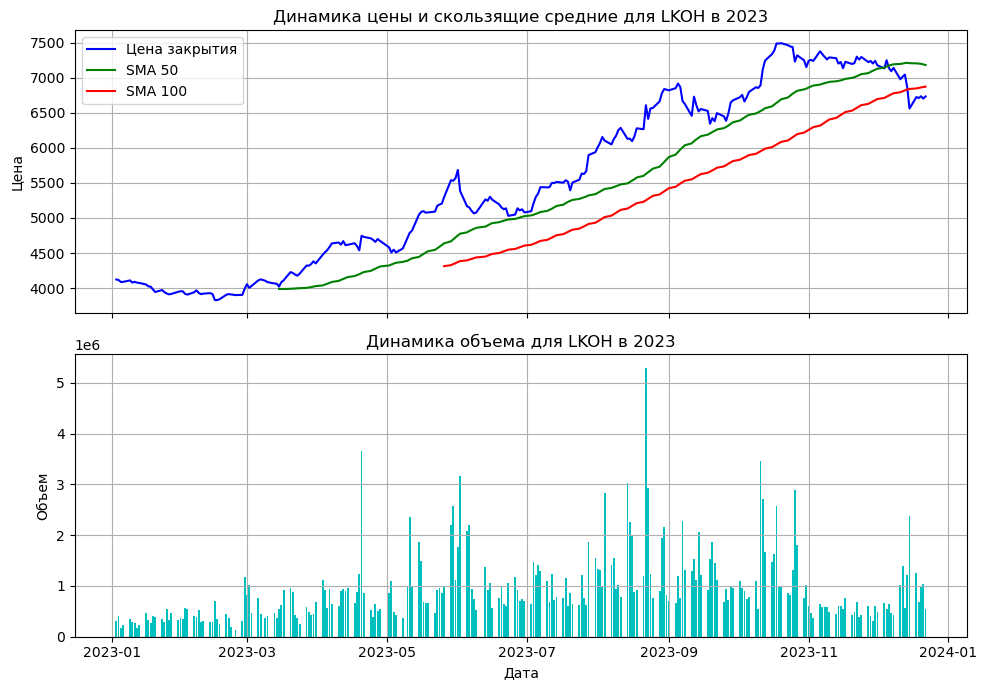

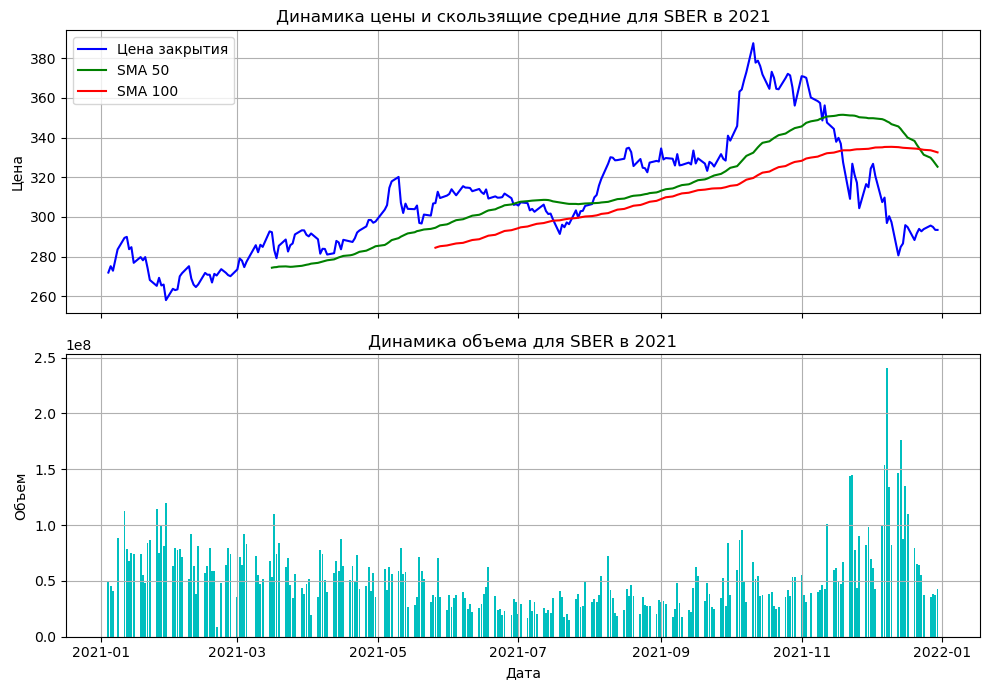

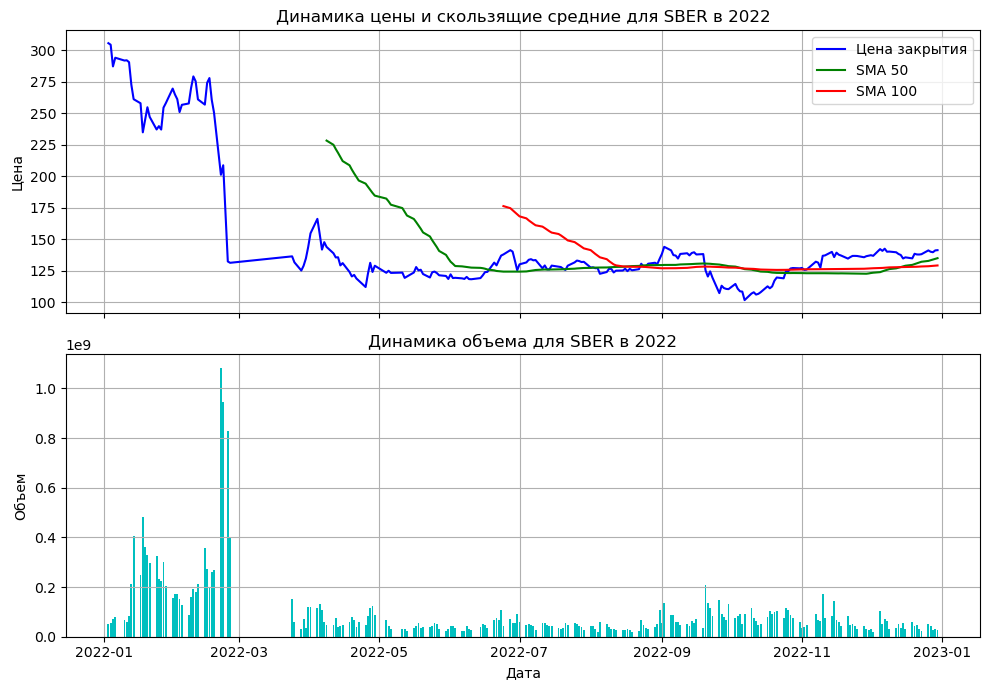

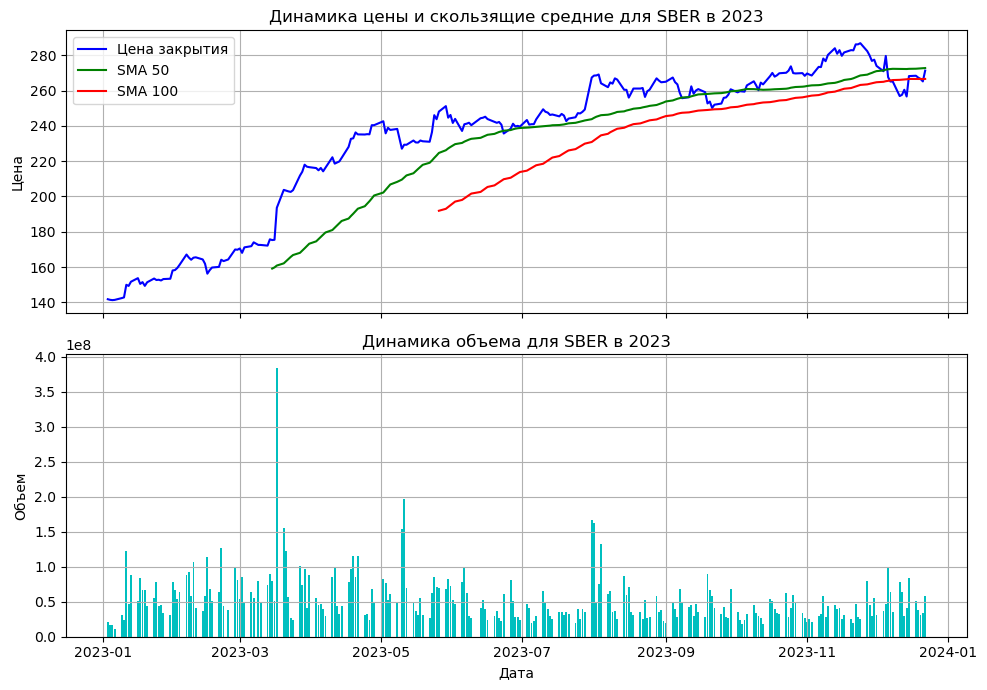

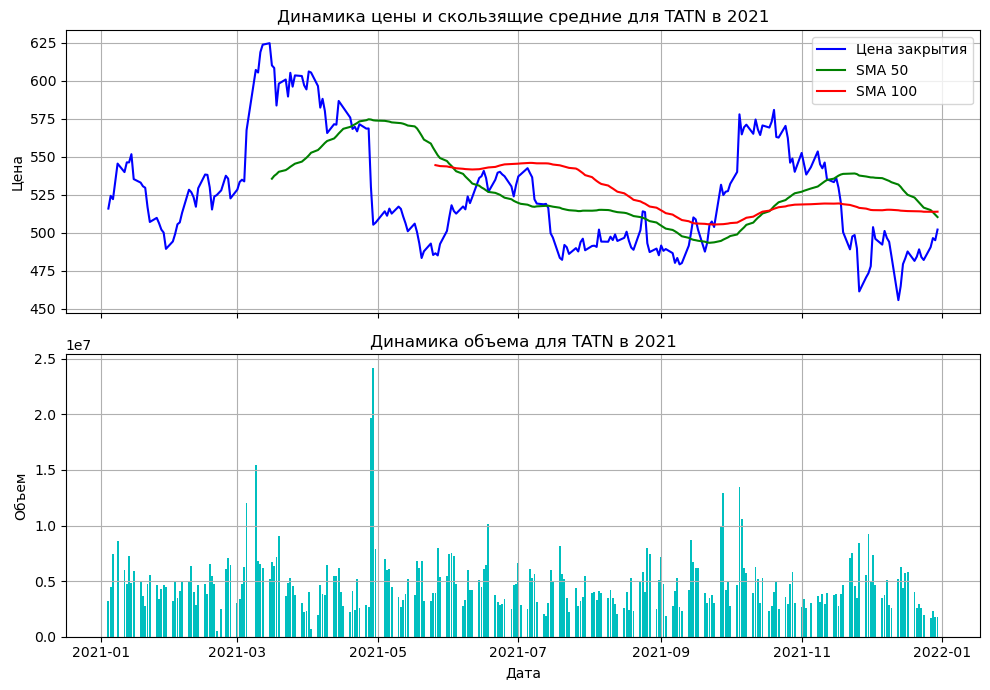

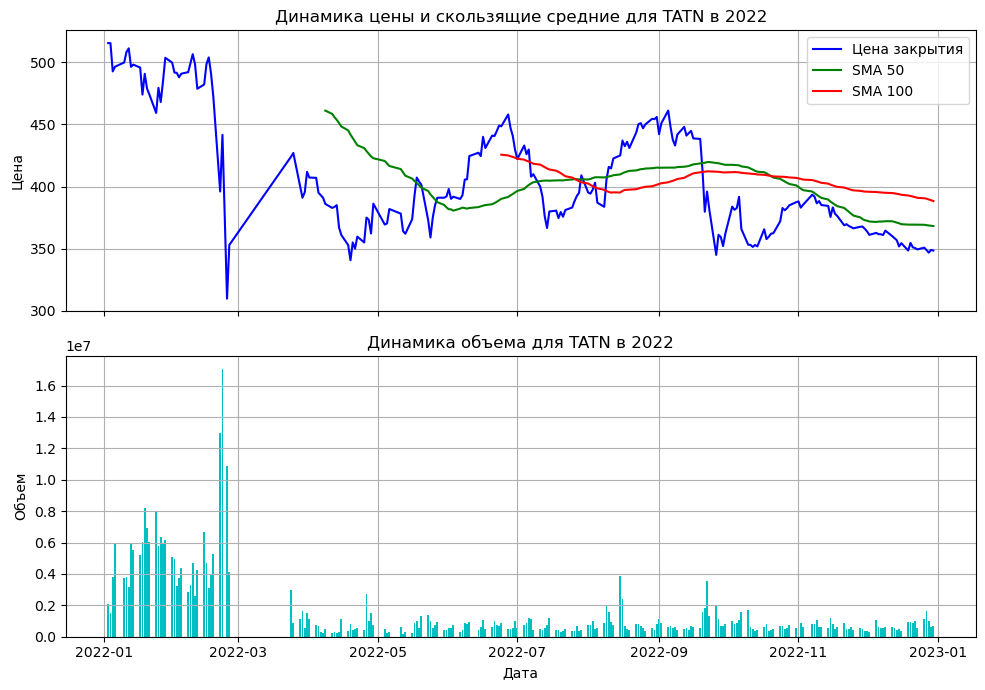

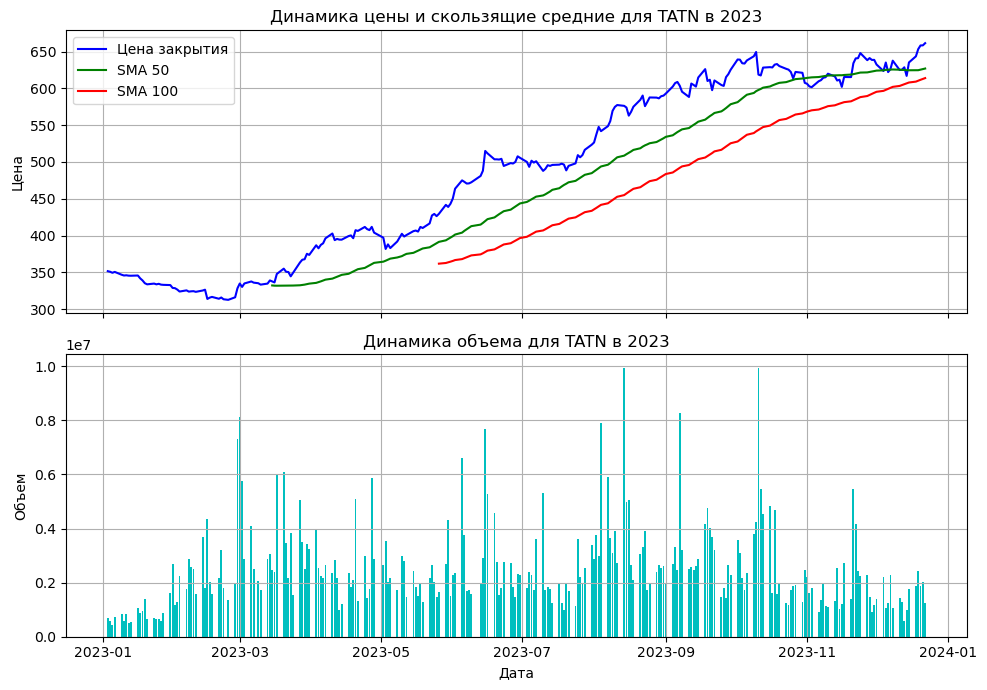

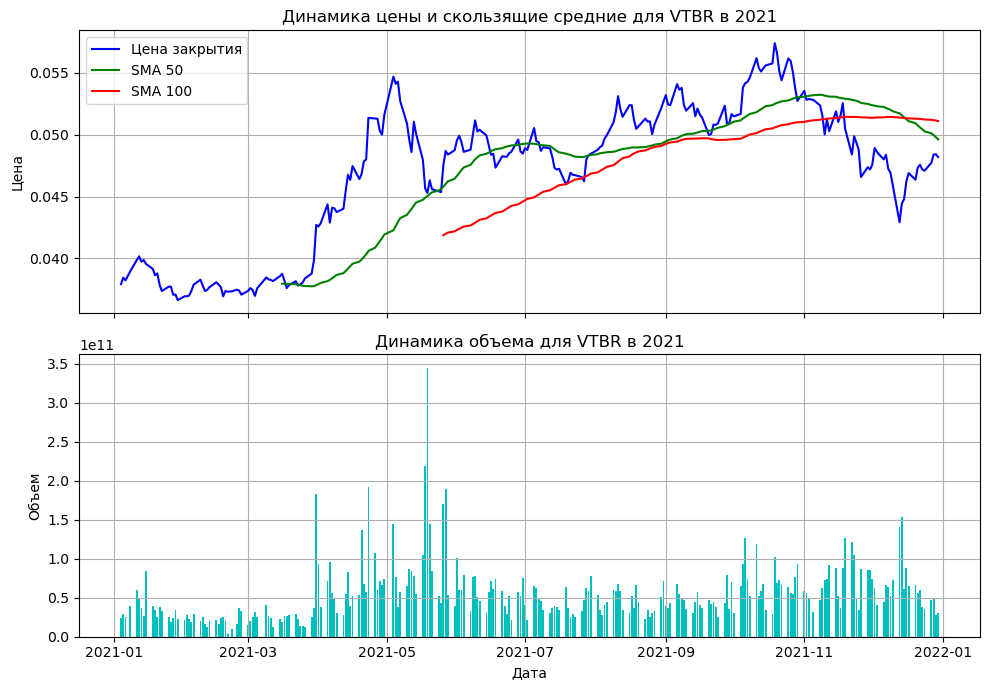

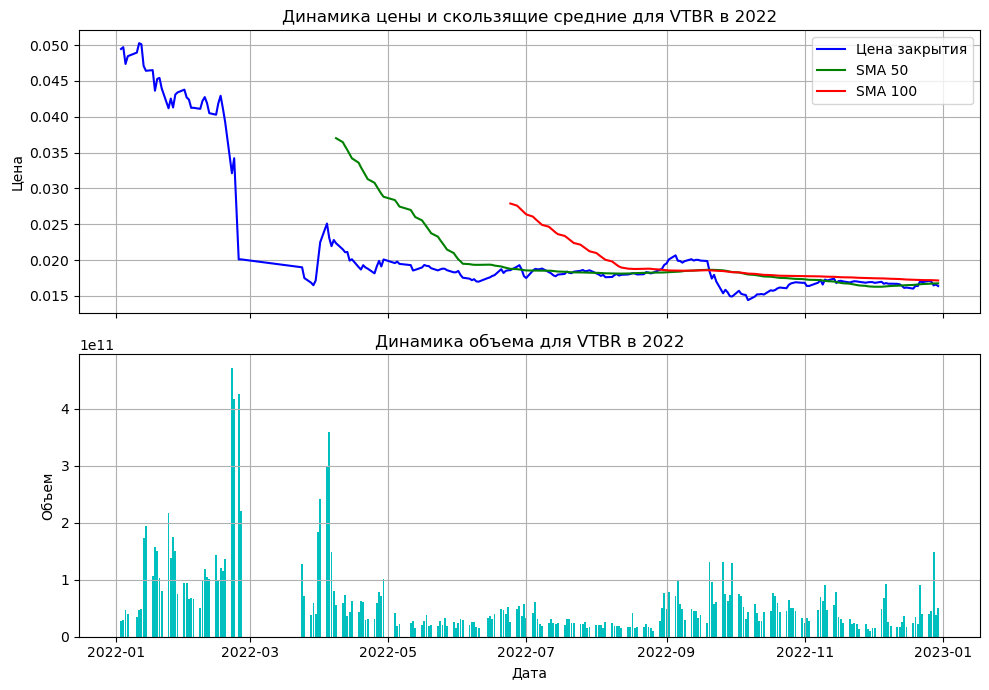

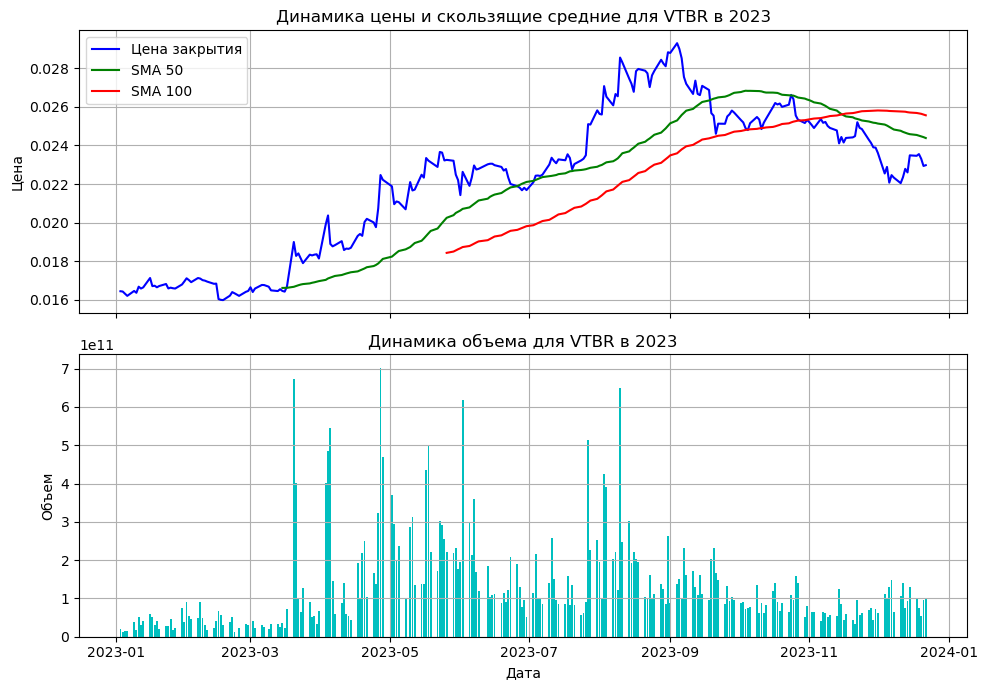

In [14]:
years = [2021, 2022, 2023]
for ticker in tickers:
    for year in years:
        vol_price(ticker, year)

Глядя на графики, можно заметить, что наблюдается тренд на снижение в цене каждой представленной акции в 2022 году. Относительной стабильностью обладали лишь акции компании "Татнефть"

Также на графиках видно, что в периоды увеличения объема акций, цены на них либо повышались, либо понижались (наглядное подтверждение вывода в п.7)

## <a class="anchor" id="9"></a> Задание 9

**Добавьте экспоненциальные скользящие средние для каждого тикера с периодом 50**

Индикатор экспоненциальная скользящая средняя (EMA) уменьшает путаницу ежедневных ценовых действий и помогает сократить шум, снижая задержку по времени и устраняя искажение информации

EMA более чувствительна к ценовым колебаниям, нежели чем SMA

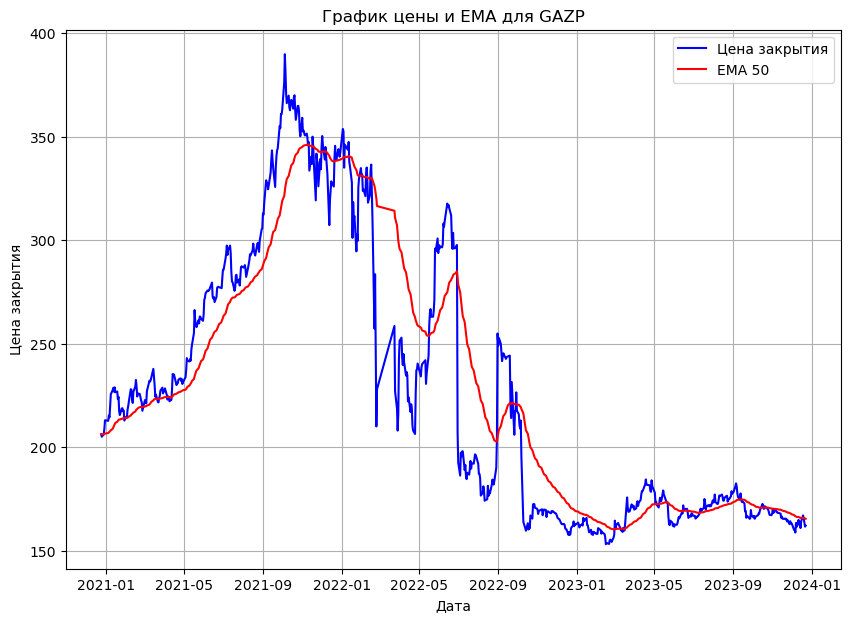

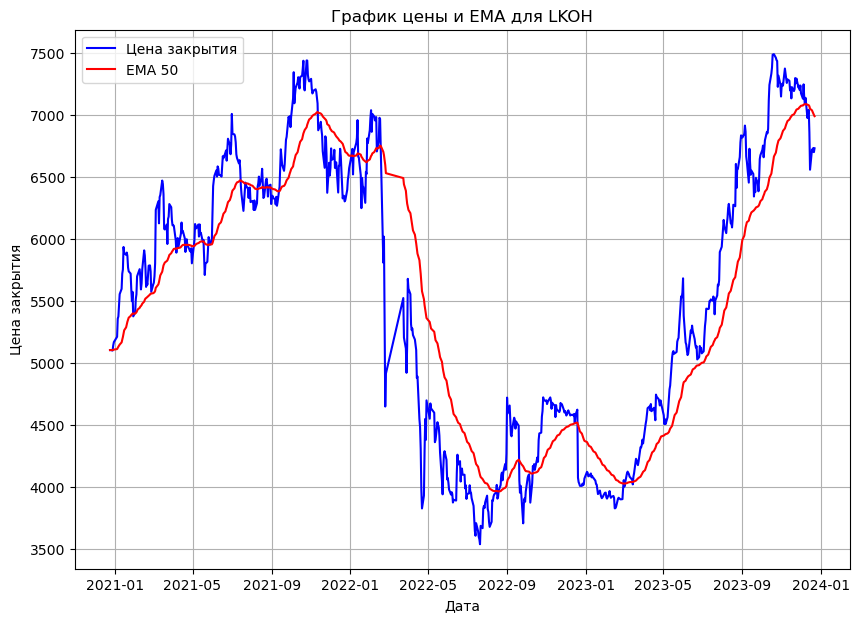

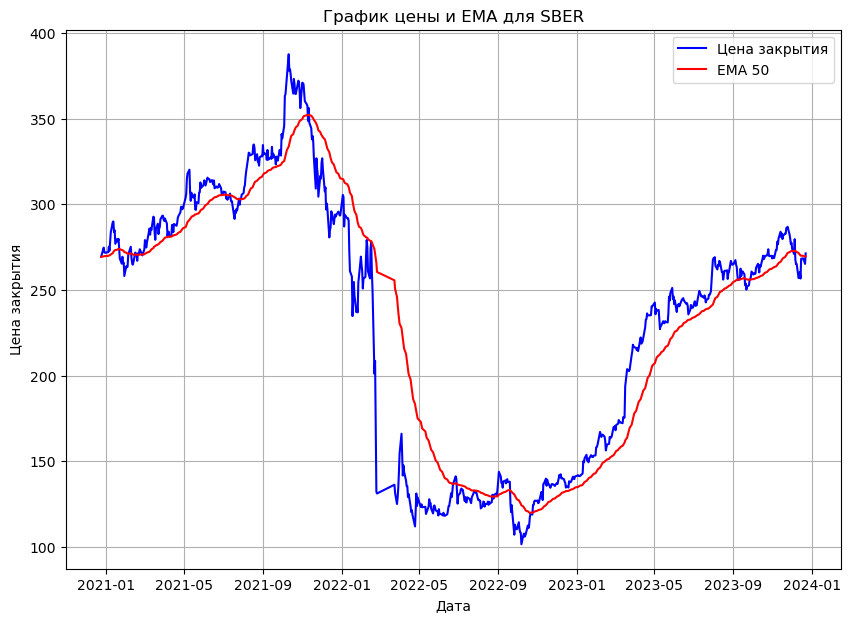

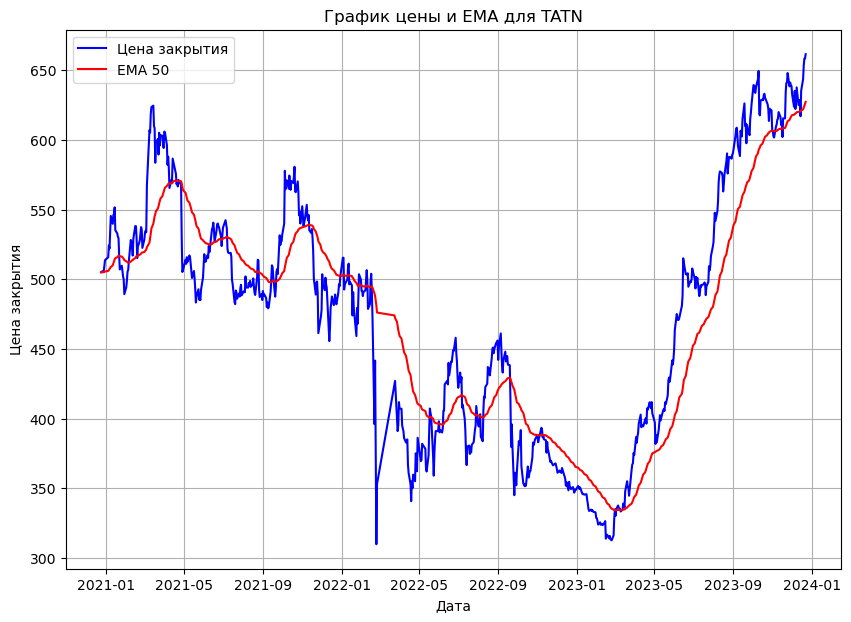

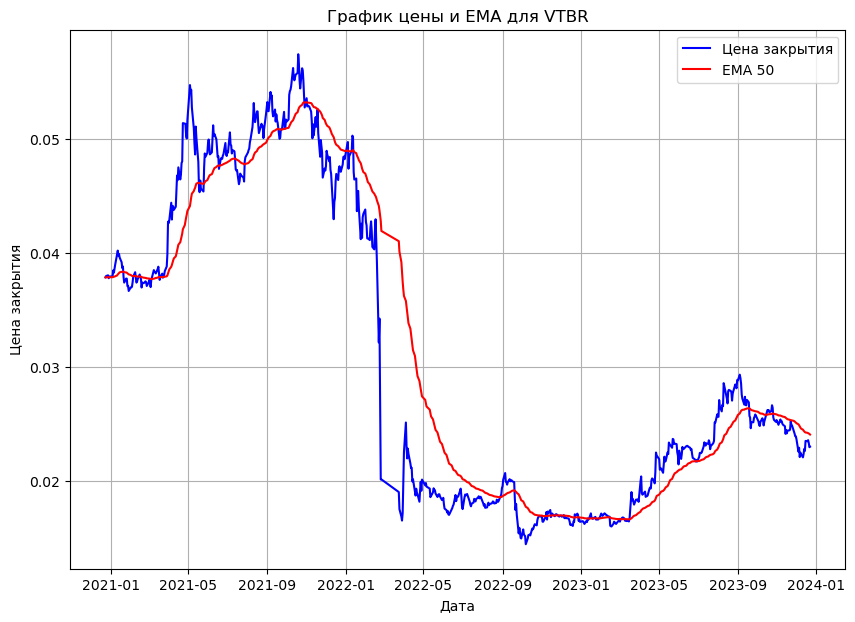

In [15]:
tickers = df['ticker'].unique()

for item in tickers:
    tic = df.query('ticker == @item')
    ema = tic['close'].ewm(span=50, adjust=False).mean() #НЕ используем корректировку

#Строим график
    plt.figure(figsize=(10, 7))
    plt.plot(tic['date'], tic['close'], label='Цена закрытия', color='blue')
    plt.plot(tic['date'], ema, label='EMA 50', color='red')
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.title(f'График цены и EMA для {item}')
    plt.legend()
    plt.grid(True)
    plt.show()

Скользящие средние являются трендовым индикатором, который дает хорошие сигналы на открытие и закрытие позиций только при наличии сильного тренда. Когда рынок находится в длительном боковике (т.е. отсутствии явного движения вверх или вниз), эти сигналы являются ложными и приводят к убыточным сделкам

## <a class="anchor" id="10"></a> Задание 10

**Осуществите расчет индикатора RSI**

In [16]:
pip install TA_Lib-0.4.24-cp39-cp39-win_amd64.whl

Processing c:\users\1\python\ад_кт2\ta_lib-0.4.24-cp39-cp39-win_amd64.whl
TA-Lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install TA-Lib

Note: you may need to restart the kernel to use updated packages.


In [18]:
import talib as ta
ta.RSI(df['close'], timeperiod=14)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3710    48.604274
3711    49.622345
3712    46.898880
3713    43.055661
3714    43.593810
Length: 3715, dtype: float64

## <a class="anchor" id="11"></a> Задание 11

**Создайте функцию для вывода графиков: цены, скользящей средней (тип и период определите самостоятельно) и отдельный график для RSI индикатора. На графике с RSI добавьте две красные линии на уровнях 70 и 30. На вход функция принимает два параметра: тикер и год**

RSI (Relative strength index, индекс относительной силы) — это индикатор технического анализа, показывающий соотношение положительных и отрицательных изменений цены акции

1. Чем сильнее относительное движение цены вверх (больше суммарная длина зеленых свечей за определенный период) - тем ближе значение индикатора к 100;


2. Чем сильнее относительное движение цены вниз (больше суммарная длина красных свечей за определенный период) - тем ближе значение индикатора к 0

Найдем RSI для каждого тикера, значение периода возьмем по умолчанию равное 14 (среднесрочный период)

Также построим экспоненциальную скользящую среднюю, т.к. она более чувствительна к колебаниям цены (возьмем период 50 дней)

In [19]:
def last(ticker, year):
    
    data = df[(df['ticker'] == ticker) & (df['date'].dt.year == year)]
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
    
    #Вычисляем скользящую среднюю
    data['ema_50'] = data['close'].ewm(span=50, adjust=False).mean()
    
    #Вычисляем RSI
    data['rsi'] = ta.RSI(data['close'], timeperiod=14)
    
    #Строим график
    axes[0].plot(data['close'], label='Цена закрытия')
    axes[0].plot(data['ema_50'], label='EMA 50')
    axes[0].set_title(f'Экспоненциальная cкользящая средняя {ticker} в {year}году')
    axes[0].legend()
    axes[0].grid(True)
    
    axes[1].plot(data['rsi'], label='RSI', color='pink')
    axes[1].axhline(y=70, color='red', linestyle='--', label='RSI 70')
    axes[1].axhline(y=30, color='red', linestyle='--', label='RSI 30')
    axes[1].set_title(f'Индикатор RSI для {ticker} в {year} году')
    axes[1].legend()
    axes[1].grid()
    
    plt.tight_layout()
    plt.show()

In [20]:
import warnings
warnings.filterwarnings('ignore')

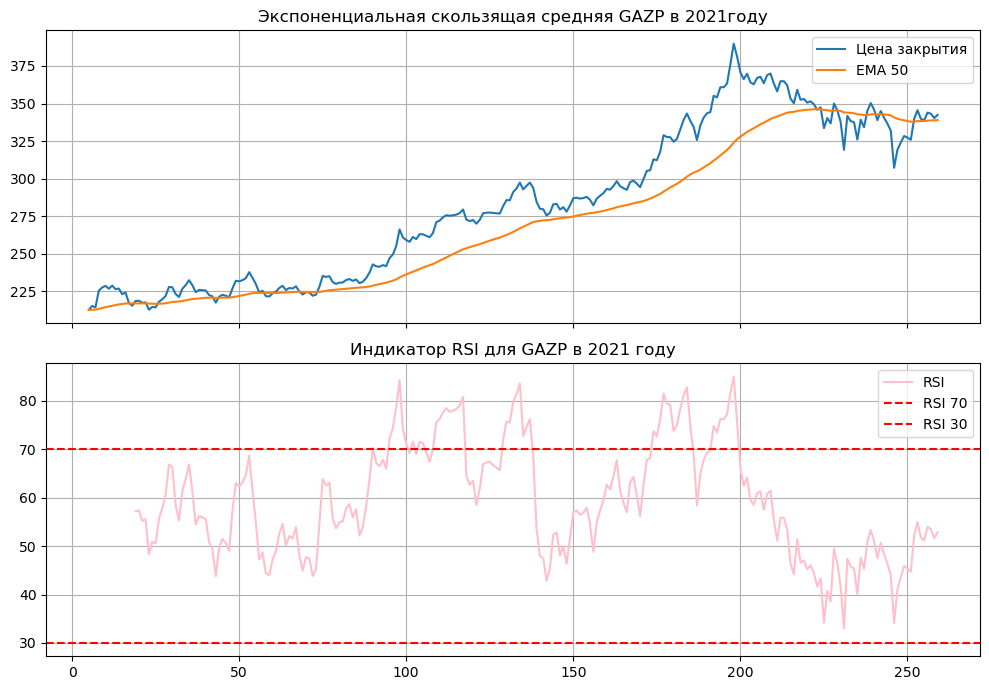

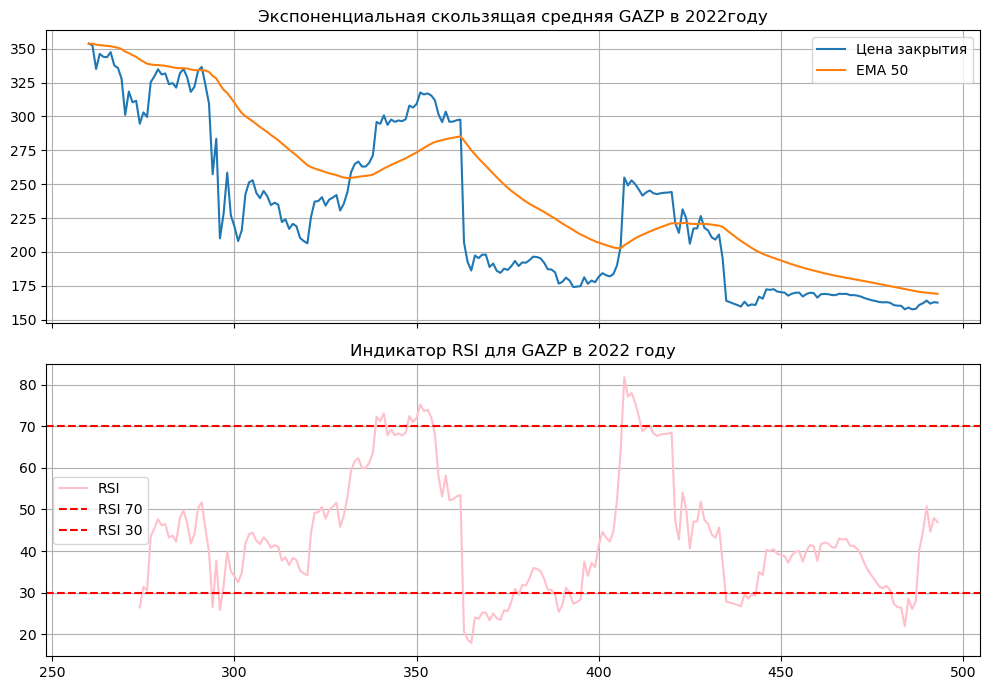

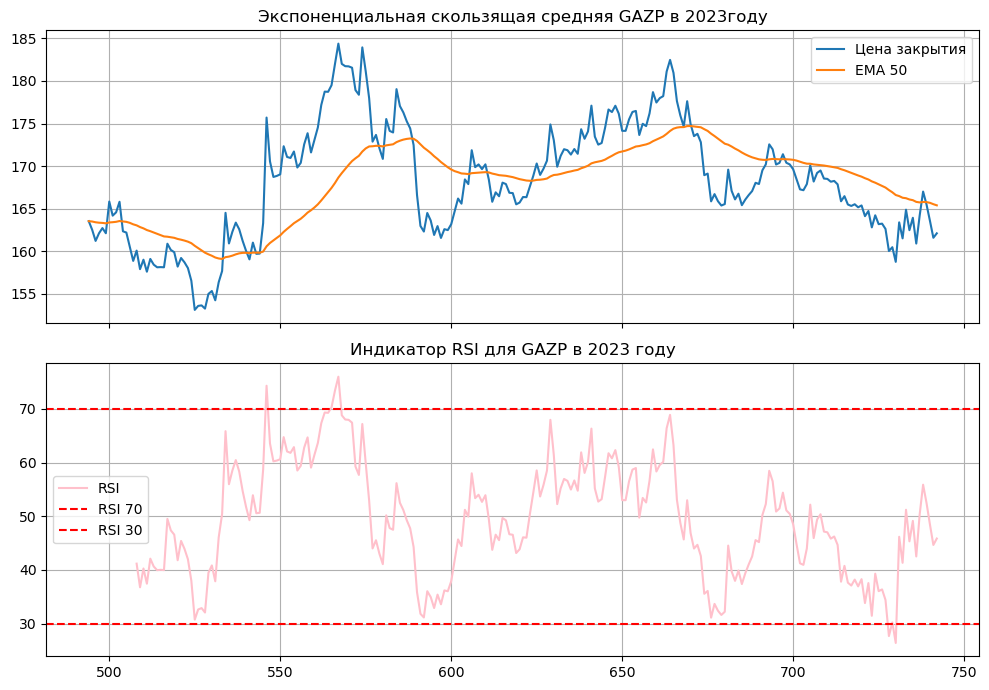

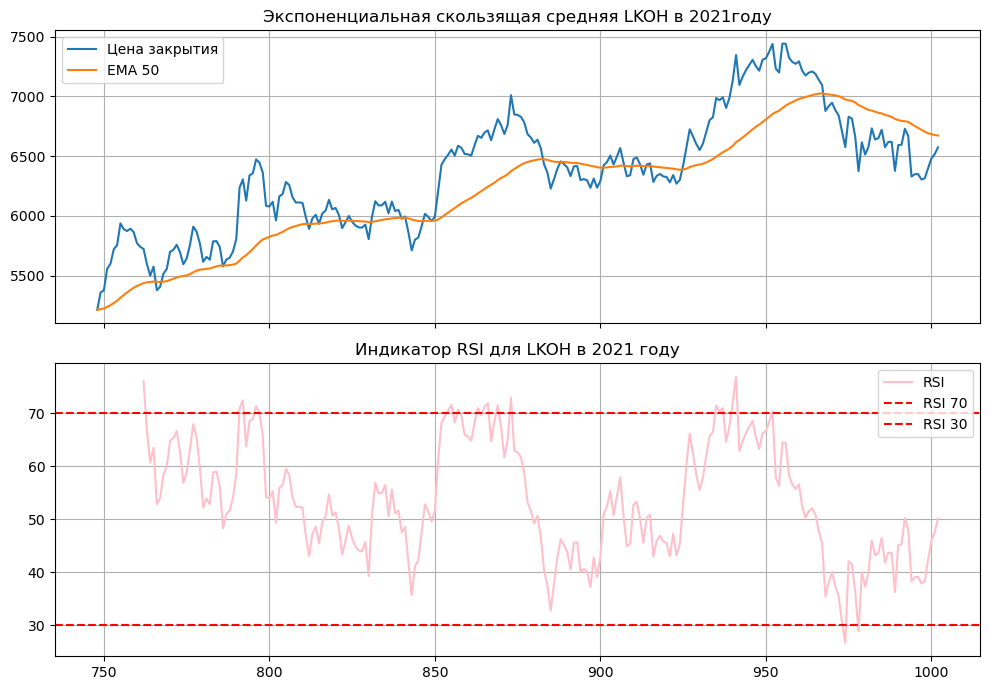

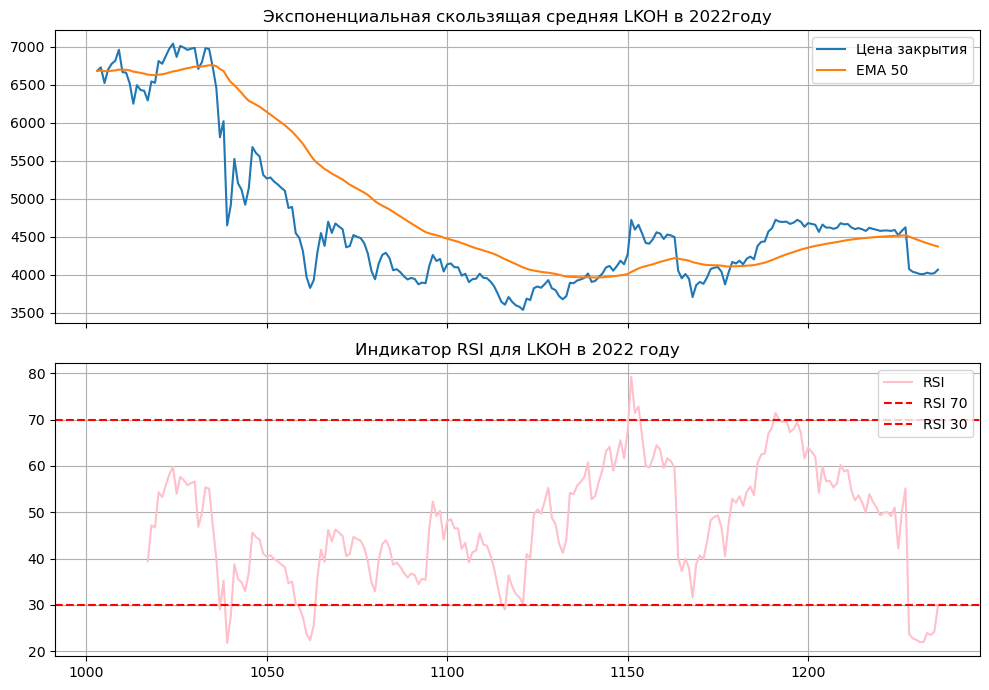

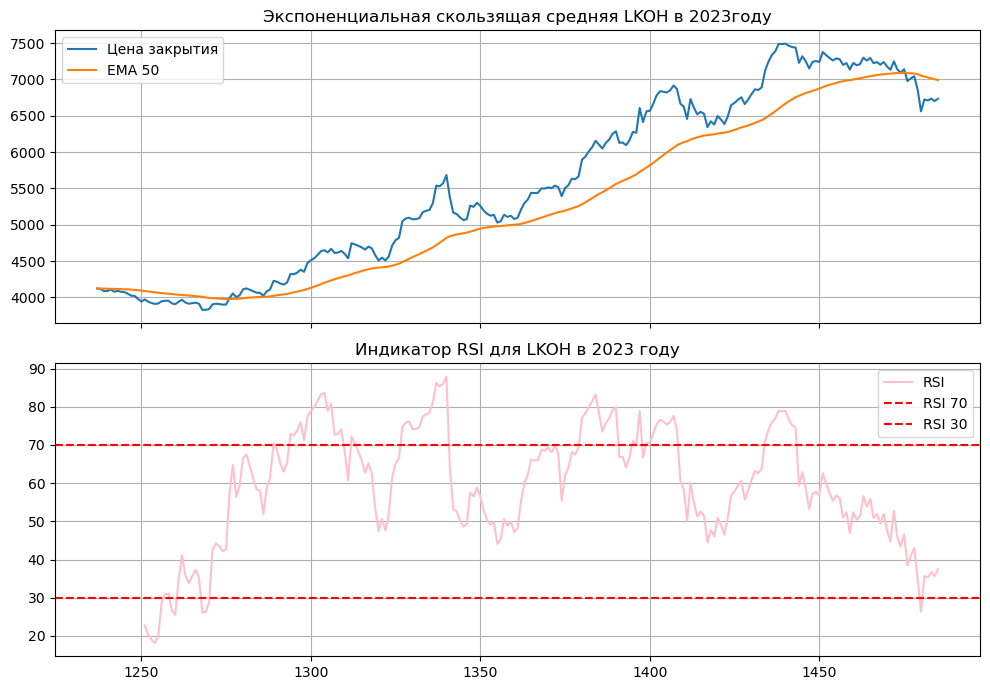

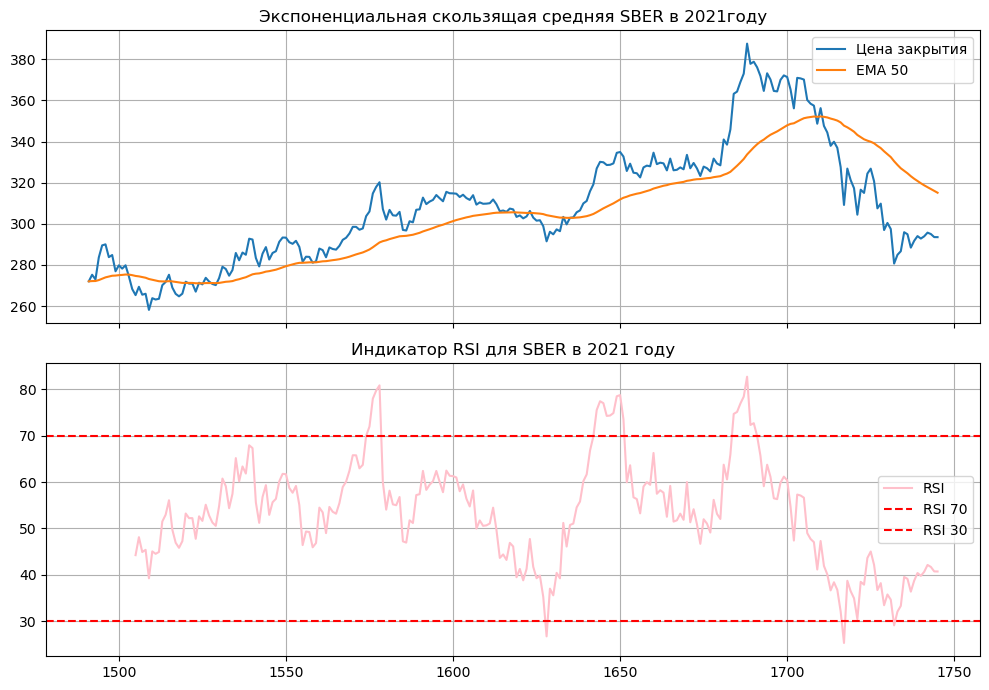

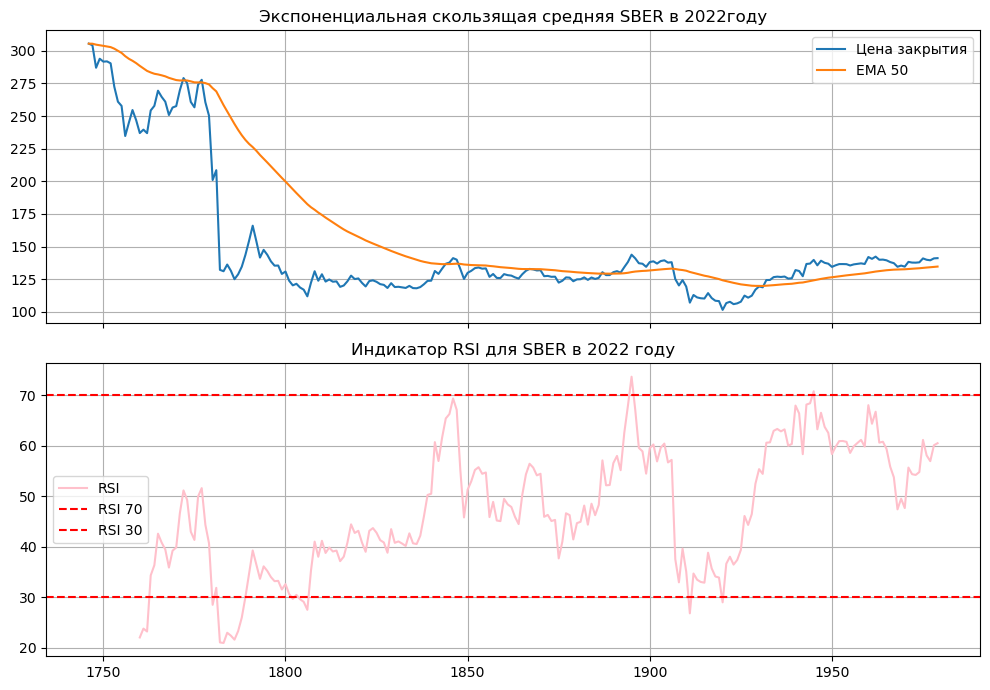

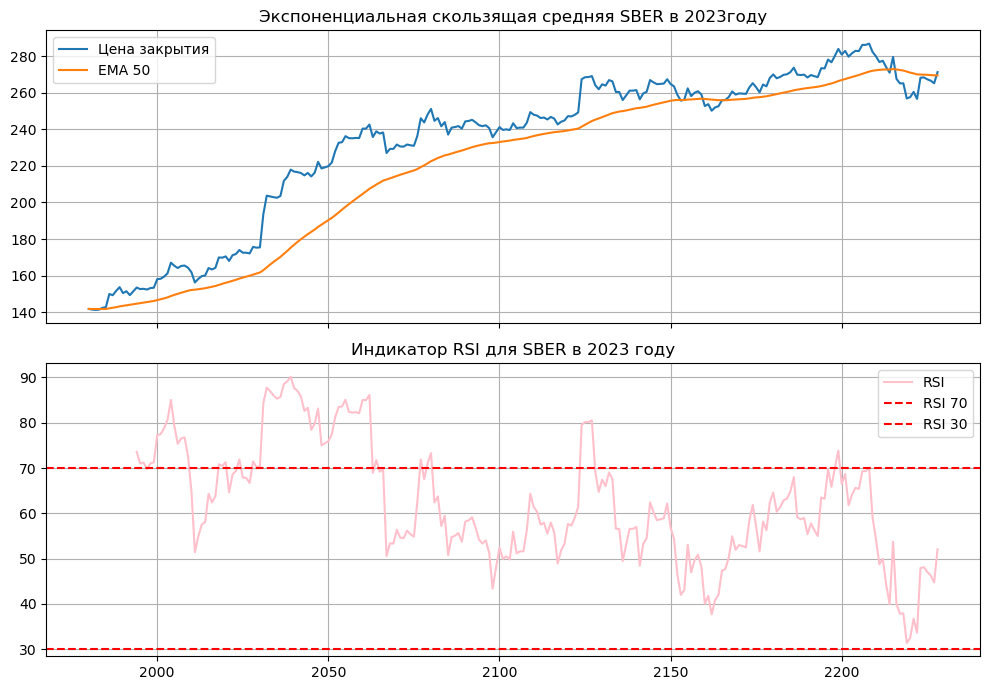

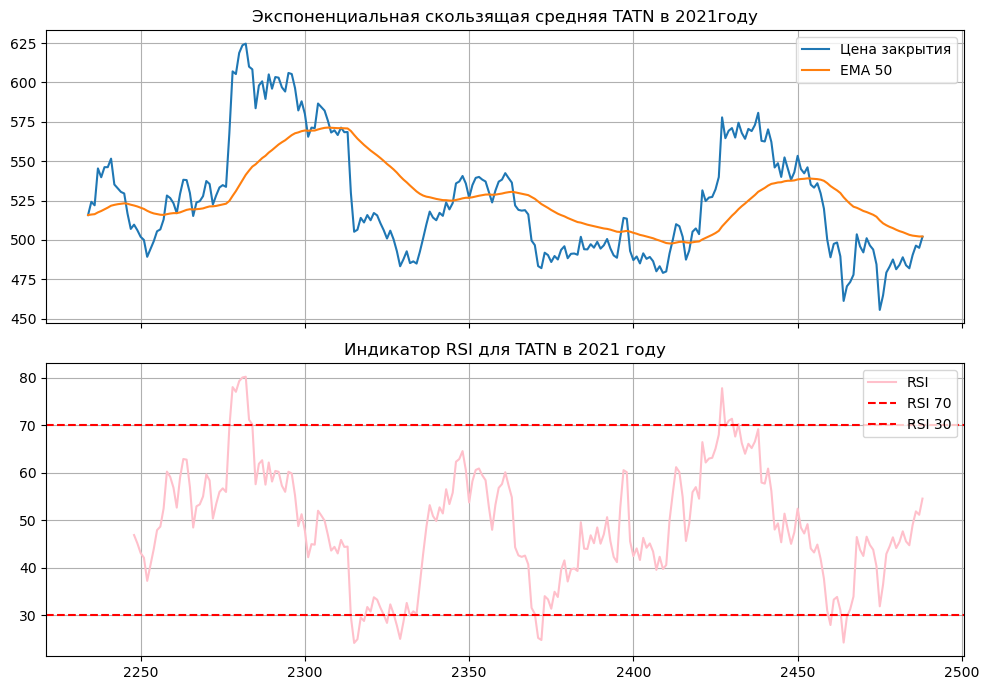

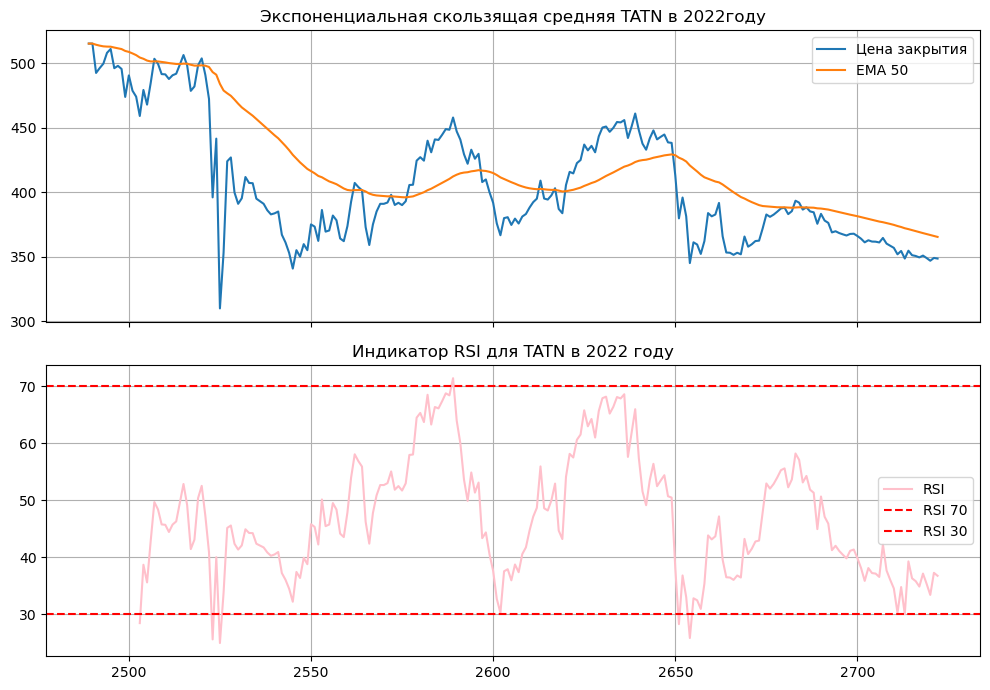

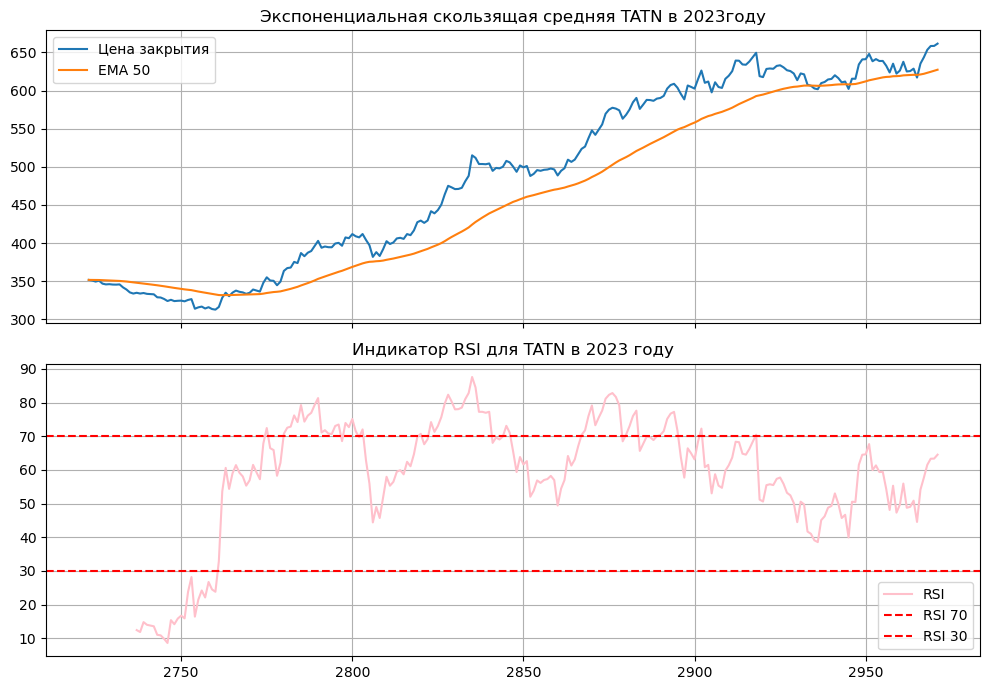

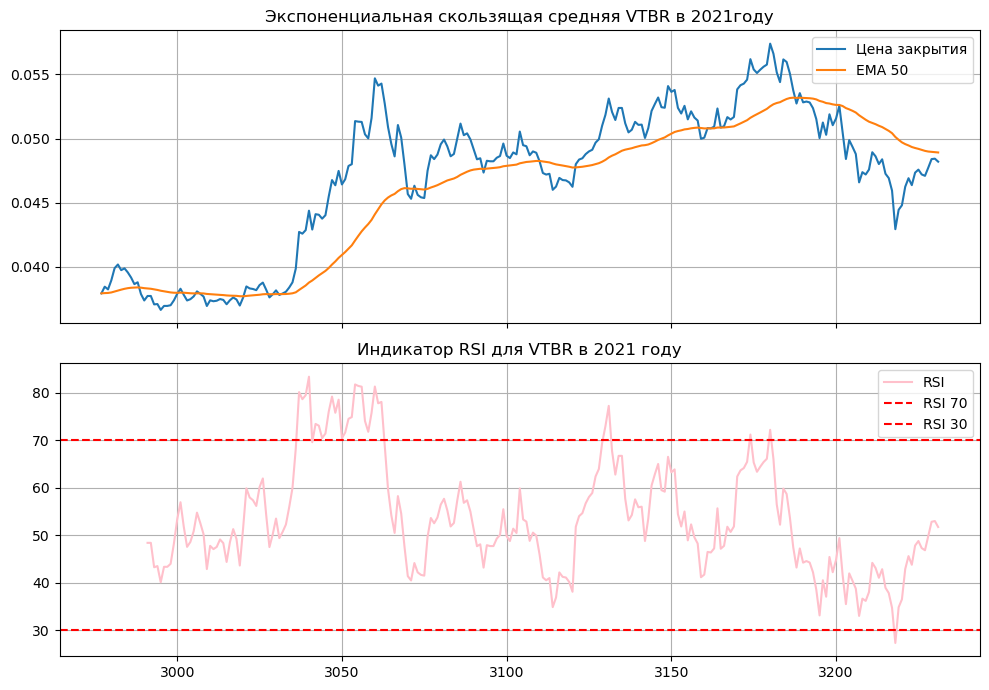

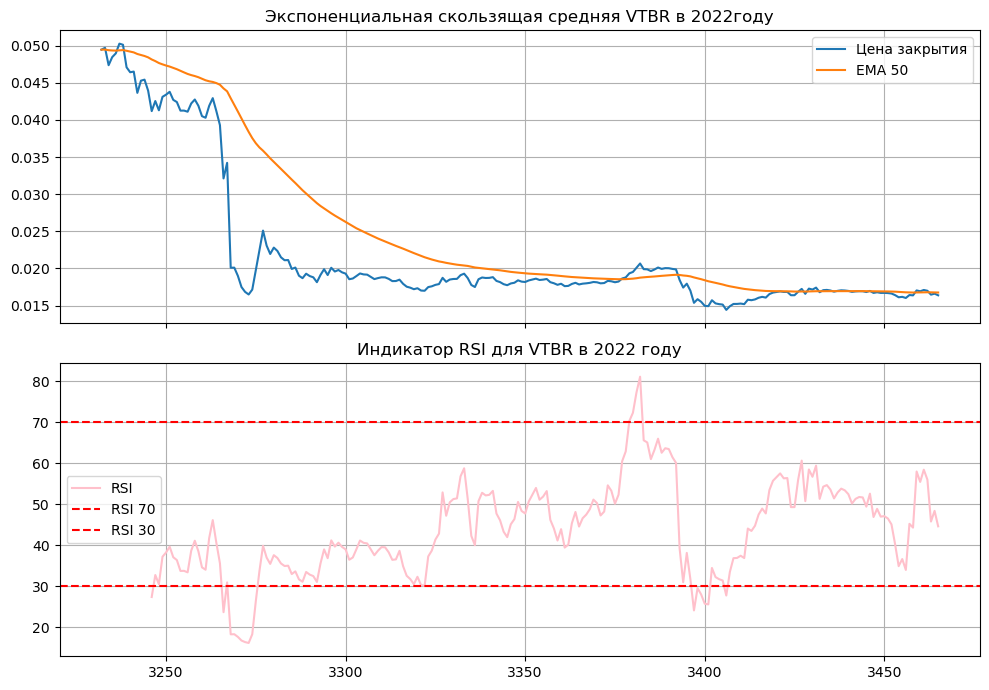

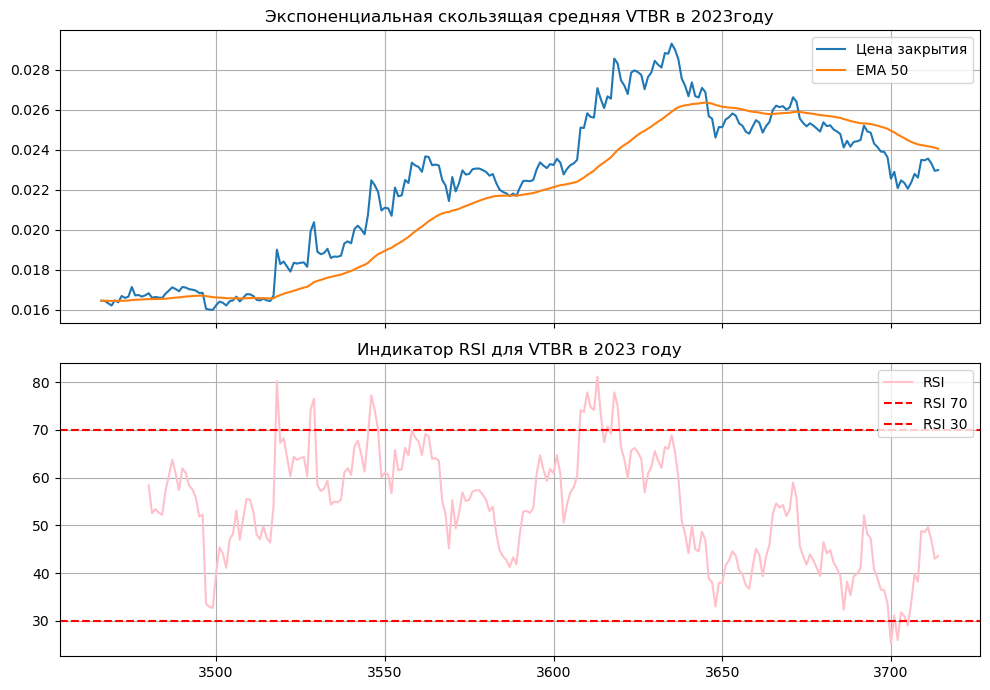

In [21]:
years = [2021, 2022, 2023]
for ticker in tickers:
    for year in years:
        last(ticker, year)

**GAZP**


1. Индикатор RSI акций Газпрома в 2021 был преимущественно выше отметки 70, это свидетельствует о том, что актив был перекуплен и покупать его сейчас неблагоразумно. При этом на рынке наблюдается тренд на повышение;

2. В 2022 RSI часто пересекает отметку 30, что свидетельствует о том, что актив перепродан и акционер рискует продать его на самом дне. Однако в данном случае такая ситуация на рынке НЕ является хорошей возможностью, чтобы рассматривать покупки, в связи с политическими и экономическими событиями. Тренд идет на снижение, рынок "медвежий";

3. В 2023 году индикатор преимущественно находился в пределах от 30 до 70. О характере направления тренда нельзя ничего сказать однозначно


**LKOH**


1. У акций компании "Лукойл" в 2021 году наблюдается аналогичная ситуация на рынке, как и у Газпрома. Тренд возрастающий, рынок "бычий";

2. В 2022 году наблюдается тренд на снижение, а в 2023 году акции компании резко возросли в основном за счет благоприятных цен на нефть, слабого рубля и ожидания дивидендов. Однако в середине осени 2023 года совет директоров дал рекомендацию выплатить по итогам девяти месяцев 2023 года дивиденды в размере ₽447 на акцию, что оказалось ниже прогнозируемого значения. Это и привело к падению акций


**SBER**

1. Динамика акций Сбера на рынке аналогичная по сравнению с динамикой акций Газпрома. Отметим, что в 2023 году Сбер увеличил дивиденды по своим акциям, что послужило причиной роста;


**TATN**

1. В начале 2021 года можно заметить резкое увеличение цены акций. Это связано с подъемом цен на нефть. В феврале 2022 года акции компании резко обвалились в связи с началом СВО (впрочем как и акции других компаний);

2. В 2023 году компания также объявила об увеличении дивидендов по своим акциям. Решение должно было быть принято на собрании 22 декабря, однако оно не состоялось


**VTBR**

1. Можно заметить резкий скачок в цене в апреле 2021 года. Это связано с объявлением финансовых показателей банка за первые 2 месяца 2021 года. ВТБ сообщил о росте чистого процентного и чистого комиссионного доходов по сравнению с аналогичным периодом прошлого года. Руководство компании также сообщило, что банк выходит на более высокий уровень прибыли, преодолев последствия COVID-19;


2. В 2022 году наблюдается тренд на снижение и в 2023 году акции вновь растут

## <a class="anchor" id="12"></a> Доп. задание

**Постройте модель прогноза цены акции**

Выполним прогноз по модели ARIMA и LSTM. Затем определеим какая модель лучше

Сделаем прогноз акций компании Газпром. Для этого создадим отдельный датасет

In [22]:
gazp_df = df.query('ticker == "GAZP"')

<AxesSubplot:>

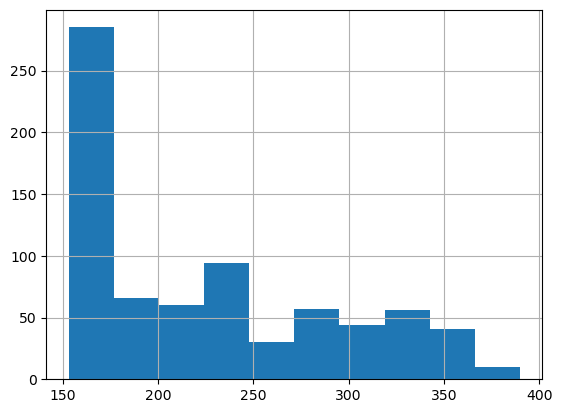

In [23]:
gazp_df['close'].hist()

Из гистограммы видно, что ряд не однородный

In [24]:
gazp_df['close'].describe()

count    743.000000
mean     227.063472
std       65.186035
min      153.090000
25%      169.030000
50%      214.420000
75%      279.580000
max      389.820000
Name: close, dtype: float64

Найдем коэффициент вариации

In [25]:
v = gazp_df['close'].std() / gazp_df['close'].mean()
print(f'Коэффициент вариации: {v}')

Коэффициент вариации: 0.2870828759212987


Коэффициент вариации составляет 0,29, что свидетельствует о неоднородности данных

Проверим наш ряд на стационарность с помощью теста Дики-Фуллера. Визуально можно сказать, что ряд не стационарен, но для достоверности проведем тест (уровень значимости равен 0,05)

Нулевая гипотеза предполагает, что ряд нестационарный (H0)

Альтернативная гипотеза, соответственно, говорит об обратном (H1)

In [26]:
from statsmodels.tsa.stattools import adfuller
 
adf_test = adfuller(gazp_df['close'])

print(f'p - значение составляет: {adf_test[1]}')

p - значение составляет: 0.5727655721472591


Р - значение больше 0,05, значит у нас нет оснований отвергнуть нулевую гипотезу. Ряд НЕ стационарен

Таким образом, визуальная оценка полностью совпала с вычислениями

В наших данных отсутствует сезонность, но явно прослеживается тренд, поэтому будем использовать модель ARIMA для прогноза

Во многих случаях взятие разности рядов позволяет привести ряд к стационарному виду. Определим порядок интегрированного ряда для нашего ряда

In [27]:
gazp_df1diff = gazp_df['close'].diff(periods=1).dropna()

Проверим получившийся ряд на стационарность

In [28]:
from statsmodels.tsa.stattools import adfuller
 
adf_test = adfuller(gazp_df1diff)

print(f'p - значение составляет: {adf_test[1]}')

p - значение составляет: 0.0


<AxesSubplot:>

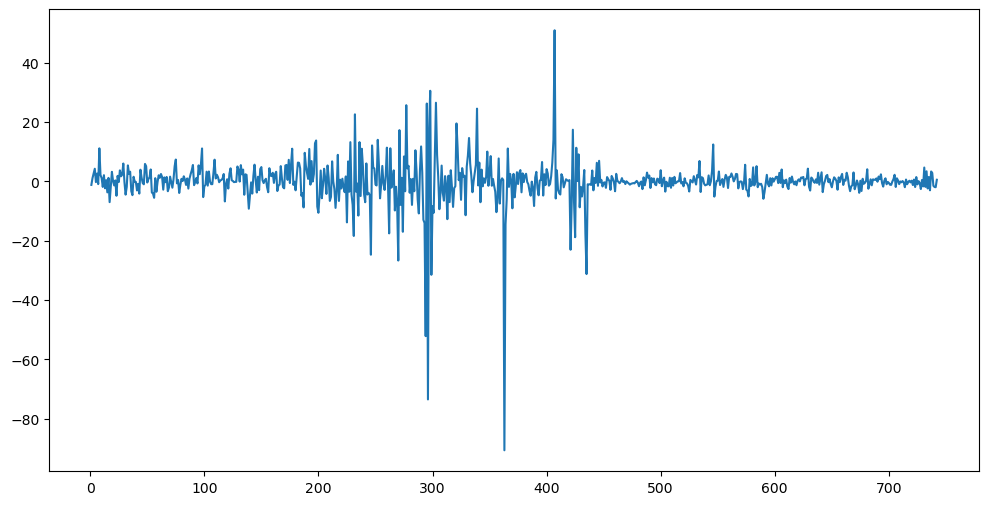

In [29]:
gazp_df1diff.plot(figsize=(12, 6))

Теперь определим параметры модели (p, d, q). Параметр d уже известен и он равен 1. Построим графики автокорреляции и частичной автокорреляции для ряда первых разностей. По этим графикам можно определить параметры p и q

In [30]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

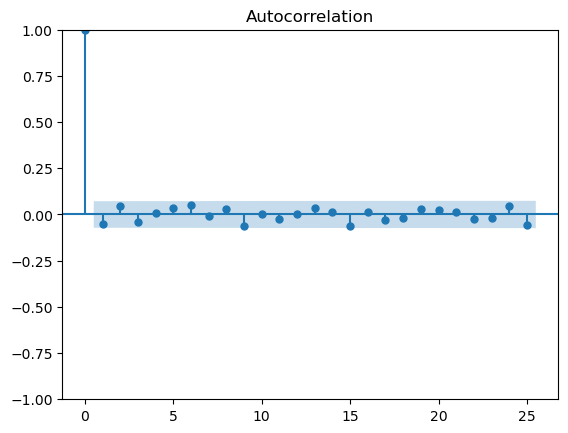

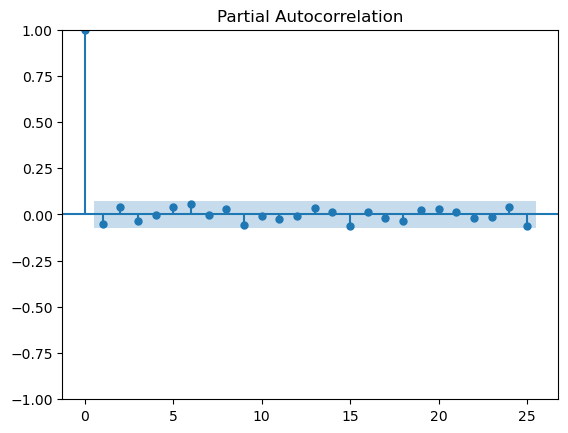

In [31]:
plot_acf(gazp_df1diff, lags=25)
plt.show()

plot_pacf(gazp_df1diff, lags=25)
plt.show()

После изучения коррелограммы PACF можно сделать вывод, что p = 1, т.к. на ней только 1 лаг сильно отличнен от нуля. По коррелограмме ACF можно увидеть, что q = 1, т.к. после лага 1 значении функций резко падают.

Итак, параметры известны, можно строить модель. Однако для ее построения возмем не все данные, а только часть. Данные из части не попавших в модель оставим для проверки точности прогноза модели

In [32]:
size = int(len(gazp_df) * 0.2)

test_data = gazp_df[-size:]
train_data = gazp_df[:-size]

len(train_data), len(test_data)

(595, 148)

In [33]:
model = sm.tsa.ARIMA(train_data['close'], order=(1, 1, 1))

# Обучение модели
model_fit = model.fit()

# Вывод информации о модели
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  595
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2098.986
Date:                Mon, 25 Dec 2023   AIC                           4203.973
Time:                        22:48:23   BIC                           4217.133
Sample:                             0   HQIC                          4209.098
                                - 595                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9003      0.084    -10.711      0.000      -1.065      -0.736
ma.L1          0.8662      0.095      9.162      0.000       0.681       1.051
sigma2        68.6707      0.914     75.135      0.0

Доверительный интервал не содержит нуля, следовательно параметры значимы

In [34]:
start = len(train_data['close'])
end = len(train_data['close']) + len(test_data['close']) - 1

In [35]:
predictions = model_fit.predict(start, end, dynamic=True)
predictions

595    163.666709
596    163.606654
597    163.660719
598    163.612046
599    163.655865
          ...    
738    163.635105
739    163.635105
740    163.635105
741    163.635105
742    163.635105
Name: predicted_mean, Length: 148, dtype: float64

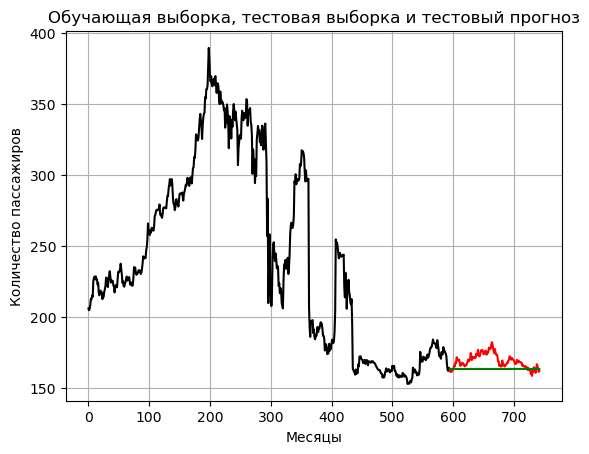

In [36]:
plt.plot(train_data['close'], color = "black")
plt.plot(test_data['close'], color = "red")
plt.plot(predictions, color = "green")
 
# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

Мы видим, что данные не имеют выраженной сезонности, поэтому модели трудно предсказать будущее. Из-за этого на графике получается прямая линия

**Построим модель LSTM**

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

Нормализуем данные

In [64]:
scaler = MinMaxScaler(feature_range=(0, 1))
gazp_df['scaled_close'] = scaler.fit_transform(gazp_df['close'].values.reshape(-1,1))

Разделим данные на тестовую и обучающую выборки

In [65]:
train_data = gazp_df[gazp_df['date'] < '2023-01-01']
test_data = gazp_df[gazp_df['date'] >= '2023-01-01']

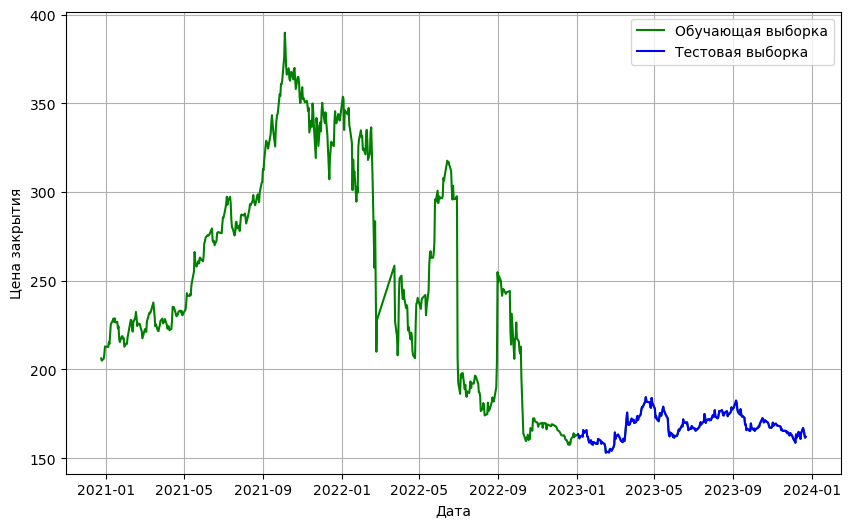

In [84]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.plot(gazp_df['date'], gazp_df['close'], 'green', label='Обучающая выборка')
plt.plot(test_data['date'], test_data['close'], 'blue', label='Тестовая выборка')
plt.legend()

In [67]:
x_train = []
y_train = []

for i in range(60, len(train_data['scaled_close'])):
    x_train.append(train_data['scaled_close'][i-60:i])
    y_train.append(train_data['scaled_close'][i])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [68]:
x_test = []
y_test = test_data['scaled_close']

for i in range(60, len(test_data)):
    x_test.append(test_data['scaled_close'][i-60:i])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [70]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [71]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [72]:
model = Sequential()

# LSTM layer 1
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.25))

# LSTM layer 2
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

# LSTM layer 3
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

# LSTM layer 4
model.add(LSTM(units = 50))
model.add(Dropout(0.25))

# final layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

In [73]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [74]:
model.fit(x_train, y_train, epochs = 550, batch_size = 10)

Epoch 1/550
44/44 [==============================] - 15s 89ms/step - loss: 0.0376
Epoch 2/550
44/44 [==============================] - 4s 90ms/step - loss: 0.0192
Epoch 3/550
44/44 [==============================] - 4s 89ms/step - loss: 0.0165
Epoch 4/550
44/44 [==============================] - 4s 89ms/step - loss: 0.0161
Epoch 5/550
44/44 [==============================] - 4s 87ms/step - loss: 0.0145
Epoch 6/550
44/44 [==============================] - 4s 88ms/step - loss: 0.0142
Epoch 7/550
44/44 [==============================] - 4s 88ms/step - loss: 0.0125
Epoch 8/550
44/44 [==============================] - 4s 89ms/step - loss: 0.0116
Epoch 9/550
44/44 [==============================] - 4s 90ms/step - loss: 0.0110
Epoch 10/550
44/44 [==============================] - 4s 90ms/step - loss: 0.0115
Epoch 11/550
44/44 [==============================] - 4s 88ms/step - loss: 0.0118
Epoch 12/550
44/44 [==============================] - 4s 88ms/step - loss: 0.0107
Epoch 13/550
44/44 [====

Epoch 101/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0034
Epoch 102/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0037
Epoch 103/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0034
Epoch 104/550
44/44 [==============================] - 4s 86ms/step - loss: 0.0037
Epoch 105/550
44/44 [==============================] - 4s 86ms/step - loss: 0.0034
Epoch 106/550
44/44 [==============================] - 4s 86ms/step - loss: 0.0036
Epoch 107/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0037
Epoch 108/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0038
Epoch 109/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0031
Epoch 110/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0033
Epoch 111/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0034
Epoch 112/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0039
Epoc

44/44 [==============================] - 4s 85ms/step - loss: 0.0028
Epoch 200/550
44/44 [==============================] - 4s 86ms/step - loss: 0.0034
Epoch 201/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0027
Epoch 202/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0028
Epoch 203/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0030
Epoch 204/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0031
Epoch 205/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0034
Epoch 206/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0027
Epoch 207/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0029
Epoch 208/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0029
Epoch 209/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0027
Epoch 210/550
44/44 [==============================] - 4s 86ms/step - loss: 0.0032
Epoch 211/550
44/4

44/44 [==============================] - 4s 83ms/step - loss: 0.0028
Epoch 298/550
44/44 [==============================] - 4s 83ms/step - loss: 0.0026
Epoch 299/550
44/44 [==============================] - 4s 83ms/step - loss: 0.0027
Epoch 300/550
44/44 [==============================] - 4s 82ms/step - loss: 0.0026
Epoch 301/550
44/44 [==============================] - 553s 13s/step - loss: 0.0030
Epoch 302/550
44/44 [==============================] - 4s 86ms/step - loss: 0.0029
Epoch 303/550
44/44 [==============================] - 4s 89ms/step - loss: 0.0026
Epoch 304/550
44/44 [==============================] - 4s 89ms/step - loss: 0.0025
Epoch 305/550
44/44 [==============================] - 4s 88ms/step - loss: 0.0026
Epoch 306/550
44/44 [==============================] - 4s 93ms/step - loss: 0.0029
Epoch 307/550
44/44 [==============================] - 4s 90ms/step - loss: 0.0026
Epoch 308/550
44/44 [==============================] - 4s 87ms/step - loss: 0.0025
Epoch 309/550
44/

44/44 [==============================] - 4s 84ms/step - loss: 0.0024
Epoch 396/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0027
Epoch 397/550
44/44 [==============================] - 4s 86ms/step - loss: 0.0022
Epoch 398/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0027
Epoch 399/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0024
Epoch 400/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0028
Epoch 401/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0027
Epoch 402/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0024
Epoch 403/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0025
Epoch 404/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0024
Epoch 405/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0027
Epoch 406/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0028
Epoch 407/550
44/4

44/44 [==============================] - 4s 87ms/step - loss: 0.0025
Epoch 494/550
44/44 [==============================] - 4s 87ms/step - loss: 0.0027
Epoch 495/550
44/44 [==============================] - 4s 91ms/step - loss: 0.0024
Epoch 496/550
44/44 [==============================] - 4s 87ms/step - loss: 0.0026
Epoch 497/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0025
Epoch 498/550
44/44 [==============================] - 4s 84ms/step - loss: 0.0024
Epoch 499/550
44/44 [==============================] - 4s 87ms/step - loss: 0.0024
Epoch 500/550
44/44 [==============================] - 4s 86ms/step - loss: 0.0024
Epoch 501/550
44/44 [==============================] - 4s 86ms/step - loss: 0.0027
Epoch 502/550
44/44 [==============================] - 4s 85ms/step - loss: 0.0023
Epoch 503/550
44/44 [==============================] - 4s 86ms/step - loss: 0.0024
Epoch 504/550
44/44 [==============================] - 4s 88ms/step - loss: 0.0025
Epoch 505/550
44/4

In [97]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

6/6 [==============================] - 0s 38ms/step


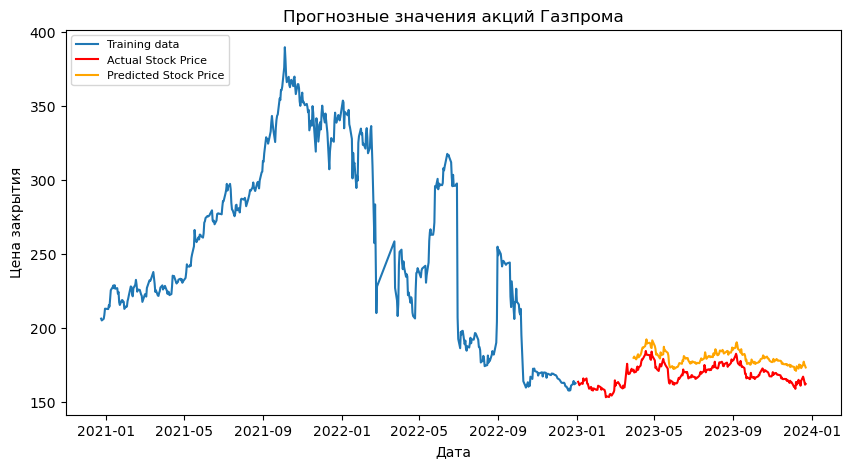

In [98]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train_data['date'], train_data['close'], label='Training data')
plt.plot(test_data['date'], test_data['close'], color = 'red', label='Actual Stock Price')
plt.plot(test_data[60:]['date'], predicted_stock_price, color = 'orange',label='Predicted Stock Price')

plt.title('Прогнозные значения акций Газпрома')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Рассчитаем фактическую производительность модели

In [80]:
from sklearn.metrics import mean_absolute_error
import math

y_true = test_data[60:]['close'].values
y_pred = predicted_stock_price

# report performance
mse = mean_squared_error(y_true, y_pred)
print(f'MSE: {mse}')
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae}')
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE: {rmse}')
mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))
print(f'MAPE: {mape}')

MSE: 89.88648619754335
MAE: 9.27438172678468
RMSE: 9.480848390178135
MAPE: 0.059381653799690744


Ошибка составила 5,94% от фактических значений. Это хороший результат. Модель пригодна для прогноза